In [8]:
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

import pandas as pd
import numpy as np
import shap
import lime
from lime import lime_tabular
import sklearn
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import plot_partial_dependence
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (32, 24)
     


In [12]:
import pydot


In [13]:
!pip install pydot


In [14]:
df=pd.read_csv("enrollments.csv")

Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.


In [15]:
df

country countrycode              region          incomegroup  \
0       afghanistan         AFG          South Asia           Low income   
1       afghanistan         AFG          South Asia           Low income   
2       afghanistan         AFG          South Asia           Low income   
3       afghanistan         AFG          South Asia           Low income   
4       afghanistan         AFG          South Asia           Low income   
...             ...         ...                 ...                  ...   
161555     zimbabwe         ZWE  Sub-Saharan Africa  Lower middle income   
161556     zimbabwe         ZWE  Sub-Saharan Africa  Lower middle income   
161557     zimbabwe         ZWE  Sub-Saharan Africa  Lower middle income   
161558     zimbabwe         ZWE  Sub-Saharan Africa  Lower middle income   
161559     zimbabwe         ZWE  Sub-Saharan Africa  Lower middle income   

            iau_id       iau_id1                         eng_name  \
0       IAU-000810  IAU-000810-1              Alberoni University   
1       IAU-000810  IAU-000810-1              Alberoni University   
2       IAU-000810  IAU-000810-1              Alberoni University   
3       IAU-000810  IAU-000810-1              Alberoni University   
4       IAU-000810  IAU-000810-1              Alberoni University   
...            ...           ...                              ...   
161555  IAU-021853  IAU-021853-1         Zimbabwe Open University   
161556  IAU-021853  IAU-021853-1         Zimbabwe Open University   
161557  IAU-021853  IAU-021853-1         Zimbabwe Open University   
161558  IAU-024536  IAU-024536-1  Zimbabwe Ezekiel Gut University   
161559  IAU-024536  IAU-024536-1  Zimbabwe Ezekiel Gut University   

                  orig_name  foundedyr  yrclosed  ...  divisions total_fields  \
0       Alberoni University     1998.0       NaN  ...        NaN          NaN   
1       Alberoni University     1998.0       NaN  ...        NaN          NaN   
2       Alberoni University     1998.0       NaN  ...        NaN          NaN   
3       Alberoni University     1998.0       NaN  ...        NaN          NaN   
4       Alberoni University     1998.0       NaN  ...        9.0         22.0   
...                     ...        ...       ...  ...        ...          ...   
161555                (ZOU)     1993.0       NaN  ...        NaN          NaN   
161556                (ZOU)     1993.0       NaN  ...        NaN          NaN   
161557                (ZOU)     1993.0       NaN  ...        6.0         40.0   
161558               (ZEGU)     2012.0       NaN  ...        NaN          NaN   
161559               (ZEGU)     2012.0       NaN  ...        4.0         25.0   

       unique_fields specialized  merger  noiau    year  \
0                NaN         0.0     0.0    0.0  2000.0   
1                NaN         0.0     0.0    0.0  2005.0   
2                NaN         0.0     0.0    0.0  2010.0   
3                NaN         0.0     0.0    0.0  2015.0   
4               21.0         0.0     0.0    0.0  2020.0   
...              ...         ...     ...    ...     ...   
161555           NaN         0.0     0.0    0.0  2010.0   
161556           NaN         0.0     0.0    0.0  2015.0   
161557          40.0         0.0     0.0    0.0  2020.0   
161558           NaN         0.0     0.0    0.0  2015.0   
161559          25.0         0.0     0.0    0.0  2020.0   

        students5_interpolated  students5_extrapolated  students5_estimated  
0                          NaN                  1546.0               1546.0  
1                          NaN                  2106.0               2106.0  
2                       2317.0                  2317.0               2317.0  
3                       1835.0                  1835.0               1835.0  
4                          NaN                  1901.0               1901.0  
...                        ...                     ...                  ...  
161555                 13773.0            

In [16]:
df1=df

In [17]:
df1=df.drop(["country","countrycode","region","incomegroup","iau_id","eng_name","orig_name","coordinates","latitude","longitude"],axis=1)

In [18]:
df1=df1.fillna(df1.mean())

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [19]:
df1

iau_id1  foundedyr     yrclosed  private01  phd_granting  \
0       IAU-000810-1     1998.0  2007.595652        0.0           0.0   
1       IAU-000810-1     1998.0  2007.595652        0.0           0.0   
2       IAU-000810-1     1998.0  2007.595652        0.0           0.0   
3       IAU-000810-1     1998.0  2007.595652        0.0           0.0   
4       IAU-000810-1     1998.0  2007.595652        0.0           0.0   
...              ...        ...          ...        ...           ...   
161555  IAU-021853-1     1993.0  2007.595652        0.0           0.0   
161556  IAU-021853-1     1993.0  2007.595652        0.0           0.0   
161557  IAU-021853-1     1993.0  2007.595652        0.0           1.0   
161558  IAU-024536-1     2012.0  2007.595652        1.0           0.0   
161559  IAU-024536-1     2012.0  2007.595652        1.0           0.0   

        m_granting  b_granting  divisions  total_fields  unique_fields  \
0         0.538853    0.844634   7.011316     26.703367        22.6904   
1         0.538853    0.844634   7.011316     26.703367        22.6904   
2         0.538853    0.844634   7.011316     26.703367        22.6904   
3         0.538853    0.844634   7.011316     26.703367        22.6904   
4         0.000000    1.000000   9.000000     22.000000        21.0000   
...            ...         ...        ...           ...            ...   
161555    0.538853    0.844634   7.011316     26.703367        22.6904   
161556    0.538853    0.844634   7.011316     26.703367        22.6904   
161557    1.000000    1.000000   6.000000     40.000000        40.0000   
161558    0.538853    0.844634   7.011316     26.703367        22.6904   
161559    1.000000    1.000000   4.000000     25.000000        25.0000   

        specialized  merger  noiau    year  students5_interpolated  \
0               0.0     0.0    0.0  2000.0              11423.0553   
1               0.0     0.0    0.0  2005.0              11423.0553   
2               0.0     0.0    0.0  2010.0               2317.0000   
3               0.0     0.0    0.0  2015.0               1835.0000   
4               0.0     0.0    0.0  2020.0              11423.0553   
...             ...     ...    ...     ...                     ...   
161555          0.0     0.0    0.0  2010.0              13773.0000   
161556          0.0     0.0    0.0  2015.0              11662.0000   
161557          0.0     0.0    0.0  2020.0              22265.0000   
161558          0.0     0.0    0.0  2015.0              11423.0553   
161559          0.0     0.0    0.0  2020.0               1347.0000   

        students5_extrapolated  students5_estimated  
0                       1546.0               1546.0  
1                       2106.0               2106.0  
2                       2317.0               2317.0  
3                       1835.0               1835.0  
4                       1901.0               1901.0  
...                        ...                  ...  
161555                 13773.0              13773.0  
161556                 11662.0              11662.0  
161557                 22265.0              22265.0  
161558                  1262.0               1262.0  
161559                  1347.0               1347.0  

[161560 rows x 17 columns]

In [20]:
sdf=df1.sample(frac=0.2, replace=False, random_state=1)

In [21]:
sdf

iau_id1  foundedyr     yrclosed  private01  phd_granting  \
97740   IAU-018316-1     1969.0  2007.595652        1.0           1.0   
129087  IAU-021309-1     1975.0  2007.595652        1.0           0.0   
122001  IAU-024904-1     1998.0  2007.595652        0.0           0.0   
33540   IAU-017738-1     1922.0  2007.595652        1.0           0.0   
101731  IAU-006690-1     1946.0  2007.595652        1.0           0.0   
...              ...        ...          ...        ...           ...   
4651    IAU-026956-1     1998.0  2007.595652        1.0           0.0   
144760  IAU-007731-1     1829.0  2007.595652        1.0           0.0   
93675   IAU-004503-2     1980.0  2007.595652        0.0           0.0   
132627  IAU-012278-1     1615.0  2007.595652        0.0           0.0   
50118   IAU-018003-1     1847.0  2007.595652        0.0           0.0   

        m_granting  b_granting  divisions  total_fields  unique_fields  \
97740     0.000000    0.000000  10.000000     51.000000        42.0000   
129087    0.538853    0.844634   7.011316     26.703367        22.6904   
122001    0.538853    0.844634   7.011316     26.703367        22.6904   
33540     0.538853    0.844634   7.011316     26.703367        22.6904   
101731    0.538853    0.844634   7.011316     26.703367        22.6904   
...            ...         ...        ...           ...            ...   
4651      0.538853    0.844634   7.011316     26.703367        22.6904   
144760    0.538853    0.844634   7.011316     26.703367        22.6904   
93675     0.538853    0.844634   7.011316     26.703367        22.6904   
132627    0.538853    0.844634   7.011316     26.703367        22.6904   
50118     0.538853    0.844634   7.011316     26.703367        22.6904   

        specialized  merger  noiau    year  students5_interpolated  \
97740           0.0     0.0    0.0  2020.0              11423.0553   
129087          0.0     0.0    0.0  1990.0              11423.0553   
122001          0.0     0.0    0.0  2005.0              11423.0553   
33540           0.0     0.0    0.0  1975.0              11423.0553   
101731          0.0     0.0    0.0  2010.0              11423.0553   
...             ...     ...    ...     ...                     ...   
4651            1.0     0.0    0.0  2005.0              11423.0553   
144760          0.0     0.0    0.0  1975.0                791.0000   
93675           0.0     1.0    0.0  2000.0              11423.0553   
132627          1.0     0.0    0.0  1950.0              11423.0553   
50118           0.0     0.0    0.0  1990.0              29944.0000   

        students5_extrapolated  students5_estimated  
97740             23743.000000         23743.000000  
129087             8888.690553          1668.000000  
122001             8888.690553          2458.000000  
33540               161.000000           161.000000  
101731             8888.690553          4970.000000  
...                        ...                  ...  
4651               8888.690553          1111.000000  
144760              791.000000           791.000000  
93675              8888.690553          6803.966037  
132627               35.000000            35.000000  
50118             29944.000000         29944.000000  

[32312 rows x 17 columns]

In [22]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32312 entries, 97740 to 50118
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   iau_id1                 32311 non-null  object 
 1   foundedyr               32312 non-null  float64
 2   yrclosed                32312 non-null  float64
 3   private01               32312 non-null  float64
 4   phd_granting            32312 non-null  float64
 5   m_granting              32312 non-null  float64
 6   b_granting              32312 non-null  float64
 7   divisions               32312 non-null  float64
 8   total_fields            32312 non-null  float64
 9   unique_fields           32312 non-null  float64
 10  specialized             32312 non-null  float64
 11  merger                  32312 non-null  float64
 12  noiau                   32312 non-null  float64
 13  year                    32312 non-null  float64
 14  students5_interpolated  32312 non-

In [23]:
sdf['iau_id1'] = sdf['iau_id1'].astype('category').cat.codes


In [24]:
target = sdf["private01"]


In [25]:
target.shape

(32312,)

In [26]:
features = sdf[['iau_id1','foundedyr','yrclosed', 'phd_granting','m_granting',
       'b_granting', 'divisions', 'total_fields',
       'unique_fields', 'specialized','merger','noiau','year','students5_interpolated','students5_extrapolated','students5_estimated']]

In [27]:
features.shape

(32312, 16)

In [28]:
datasetClean = pd.concat([features,target], axis = 1, join = 'inner')

In [29]:
datasetClean.shape

(32312, 17)

In [30]:
datasetClean.isna().sum()

iau_id1                   0
foundedyr                 0
yrclosed                  0
phd_granting              0
m_granting                0
b_granting                0
divisions                 0
total_fields              0
unique_fields             0
specialized               0
merger                    0
noiau                     0
year                      0
students5_interpolated    0
students5_extrapolated    0
students5_estimated       0
private01                 0
dtype: int64

In [31]:
datasetClean.shape

(32312, 17)

In [32]:
datasetClean.isna().sum()

iau_id1                   0
foundedyr                 0
yrclosed                  0
phd_granting              0
m_granting                0
b_granting                0
divisions                 0
total_fields              0
unique_fields             0
specialized               0
merger                    0
noiau                     0
year                      0
students5_interpolated    0
students5_extrapolated    0
students5_estimated       0
private01                 0
dtype: int64

In [33]:
target.shape

(32312,)

In [34]:
features.shape

(32312, 16)

In [35]:
sdf = sdf.reset_index()

In [36]:
sdf.replace([np.inf, -np.inf], np.nan, inplace=True)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [38]:
X_train.head()

iau_id1  foundedyr     yrclosed  phd_granting  m_granting  b_granting  \
145916     5433     1867.0  2007.595652           0.0    0.538853    0.844634   
87492      9024     1625.0  2007.595652           0.0    0.538853    0.844634   
142378     1798     1898.0  2007.595652           0.0    0.538853    0.844634   
144668     3714     1913.0  2007.595652           0.0    0.538853    0.844634   
87167      8978     1996.0  2007.595652           0.0    0.000000    1.000000   

        divisions  total_fields  unique_fields  specialized  merger  noiau  \
145916   7.011316     26.703367        22.6904          0.0     0.0    0.0   
87492    7.011316     26.703367        22.6904          0.0     0.0    0.0   
142378   7.011316     26.703367        22.6904          0.0     0.0    0.0   
144668   7.011316     26.703367        22.6904          0.0     0.0    0.0   
87167    7.000000      8.000000         8.0000          0.0     0.0    0.0   

          year  students5_interpolated  students5_extrapolated  \
145916  2000.0               1848.0000             1848.000000   
87492   2010.0              20012.0000            20012.000000   
142378  1995.0              12703.0000            12703.000000   
144668  1965.0              11423.0553             6366.000000   
87167   2015.0              11423.0553             8888.690553   

        students5_estimated  
145916               1848.0  
87492               20012.0  
142378              12703.0  
144668               6366.0  
87167                2104.0

In [39]:
y_train.shape

(21649,)

In [50]:
import statsmodels.api as sm

lin_reg = sm.OLS(y_train,X_train).fit()

In [51]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              private01   R-squared (uncentered):                   0.495
Model:                            OLS   Adj. R-squared (uncentered):              0.495
Method:                 Least Squares   F-statistic:                              1326.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):                        0.00
Time:                        16:33:16   Log-Likelihood:                         -14180.
No. Observations:               21649   AIC:                                  2.839e+04
Df Residuals:                   21633   BIC:                                  2.852e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
iau_id1                -5.727e-06   8.15e-07     -7.026      0.000   -7.32e-06   -4.13e-06
foundedyr                  0.0008   3.91e-05     19.451      0.000       0.001       0.001
yrclosed                  -0.0037      0.000    -21.985      0.000      -0.004      -0.003
phd_granting              -0.1017      0.016     -6.191      0.000      -0.134      -0.070
m_granting                -0.1629      0.020     -8.294      0.000      -0.201      -0.124
b_granting                 0.1417      0.025      5.703      0.000       0.093       0.190
divisions                 -0.0045      0.002     -2.818      0.005      -0.008      -0.001
total_fields               0.0026      0.001      3.837      0.000       0.001       0.004
unique_fields             -0.0057      0.001     -5.763      0.000      -0.008      -0.004
specialized               -0.0758      0.008     -9.518      0.000      -0.091      -0.060
merger                    -0.2620      0.010    -25.490      0.000      -0.282      -0.242
noiau                      0.1876      0.059      3.178      0.001       0.072       0.303
year                       0.0033      0.000     18.797      0.000       0.003       0.004
students5_interpolated    1.4e-06   3.03e-07      4.616      0.000    8.05e-07    1.99e-06
students5_extrapolated  3.046e-06   4.38e-07      6.954      0.000    2.19e-06    3.91e-06
students5_estimated    -6.099e-06   3.98e-07    -15.320      0.000   -6.88e-06   -5.32e-06
==============================================================================
Omnibus:                    16958.773   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1410.936
Skew:                           0.198   Prob(JB):                    4.16e-307
Kurtosis:                       1.814   Cond. No.                     8.16e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#Predicting the values
lr_pred = lin_reg.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [54]:
#Checking accuracy of predictions
print('Linear Model - Test')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

Linear Model - Test
MAE: 0.440148
RMSE: 0.466290
R2 0.115062


In [55]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(max_depth=3, random_state=1234)
DTree.fit(X_train,y_train)

DTree_score = DTree.score(X_test, y_test)
print(DTree_score)

0.1747445247870033


In [174]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
    y_pred = model.predict(X_test)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test,y_pred))


In [175]:
# Model Evaluation on DecisionTreeRegressor
print("DECISION TREE REGRESSION: ")
print("-x"*25)
model_sel(DTree)

DECISION TREE REGRESSION: 
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
MODEL EVALUATION

r2_score of the model: 
0.1747445247870033


In [176]:
prediction_tree = DTree.predict(X_test)

In [178]:
#Checking accuracy of predictions
print('Decision tree')
print('MAE: %f'% mean_absolute_error(y_test, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, prediction_tree)))   
print('R2 %f' % r2_score(y_test, prediction_tree))

Decision tree
MAE: 0.402933
RMSE: 0.450291
R2 0.174745


[Text(0.5, 0.875, 'foundedyr <= 1978.5\nsquared_error = 0.245\nsamples = 21649\nvalue = 0.43'),
 Text(0.25, 0.625, 'students5_estimated <= 3202.5\nsquared_error = 0.223\nsamples = 15626\nvalue = 0.334'),
 Text(0.125, 0.375, 'specialized <= 0.5\nsquared_error = 0.248\nsamples = 6997\nvalue = 0.452'),
 Text(0.0625, 0.125, 'squared_error = 0.25\nsamples = 5159\nvalue = 0.502'),
 Text(0.1875, 0.125, 'squared_error = 0.215\nsamples = 1838\nvalue = 0.312'),
 Text(0.375, 0.375, 'students5_extrapolated <= 13047.0\nsquared_error = 0.182\nsamples = 8629\nvalue = 0.239'),
 Text(0.3125, 0.125, 'squared_error = 0.199\nsamples = 6535\nvalue = 0.274'),
 Text(0.4375, 0.125, 'squared_error = 0.114\nsamples = 2094\nvalue = 0.131'),
 Text(0.75, 0.625, 'students5_estimated <= 4907.0\nsquared_error = 0.219\nsamples = 6023\nvalue = 0.677'),
 Text(0.625, 0.375, 'students5_extrapolated <= 4861.0\nsquared_error = 0.18\nsamples = 4390\nvalue = 0.764'),
 Text(0.5625, 0.125, 'squared_error = 0.237\nsamples = 1451

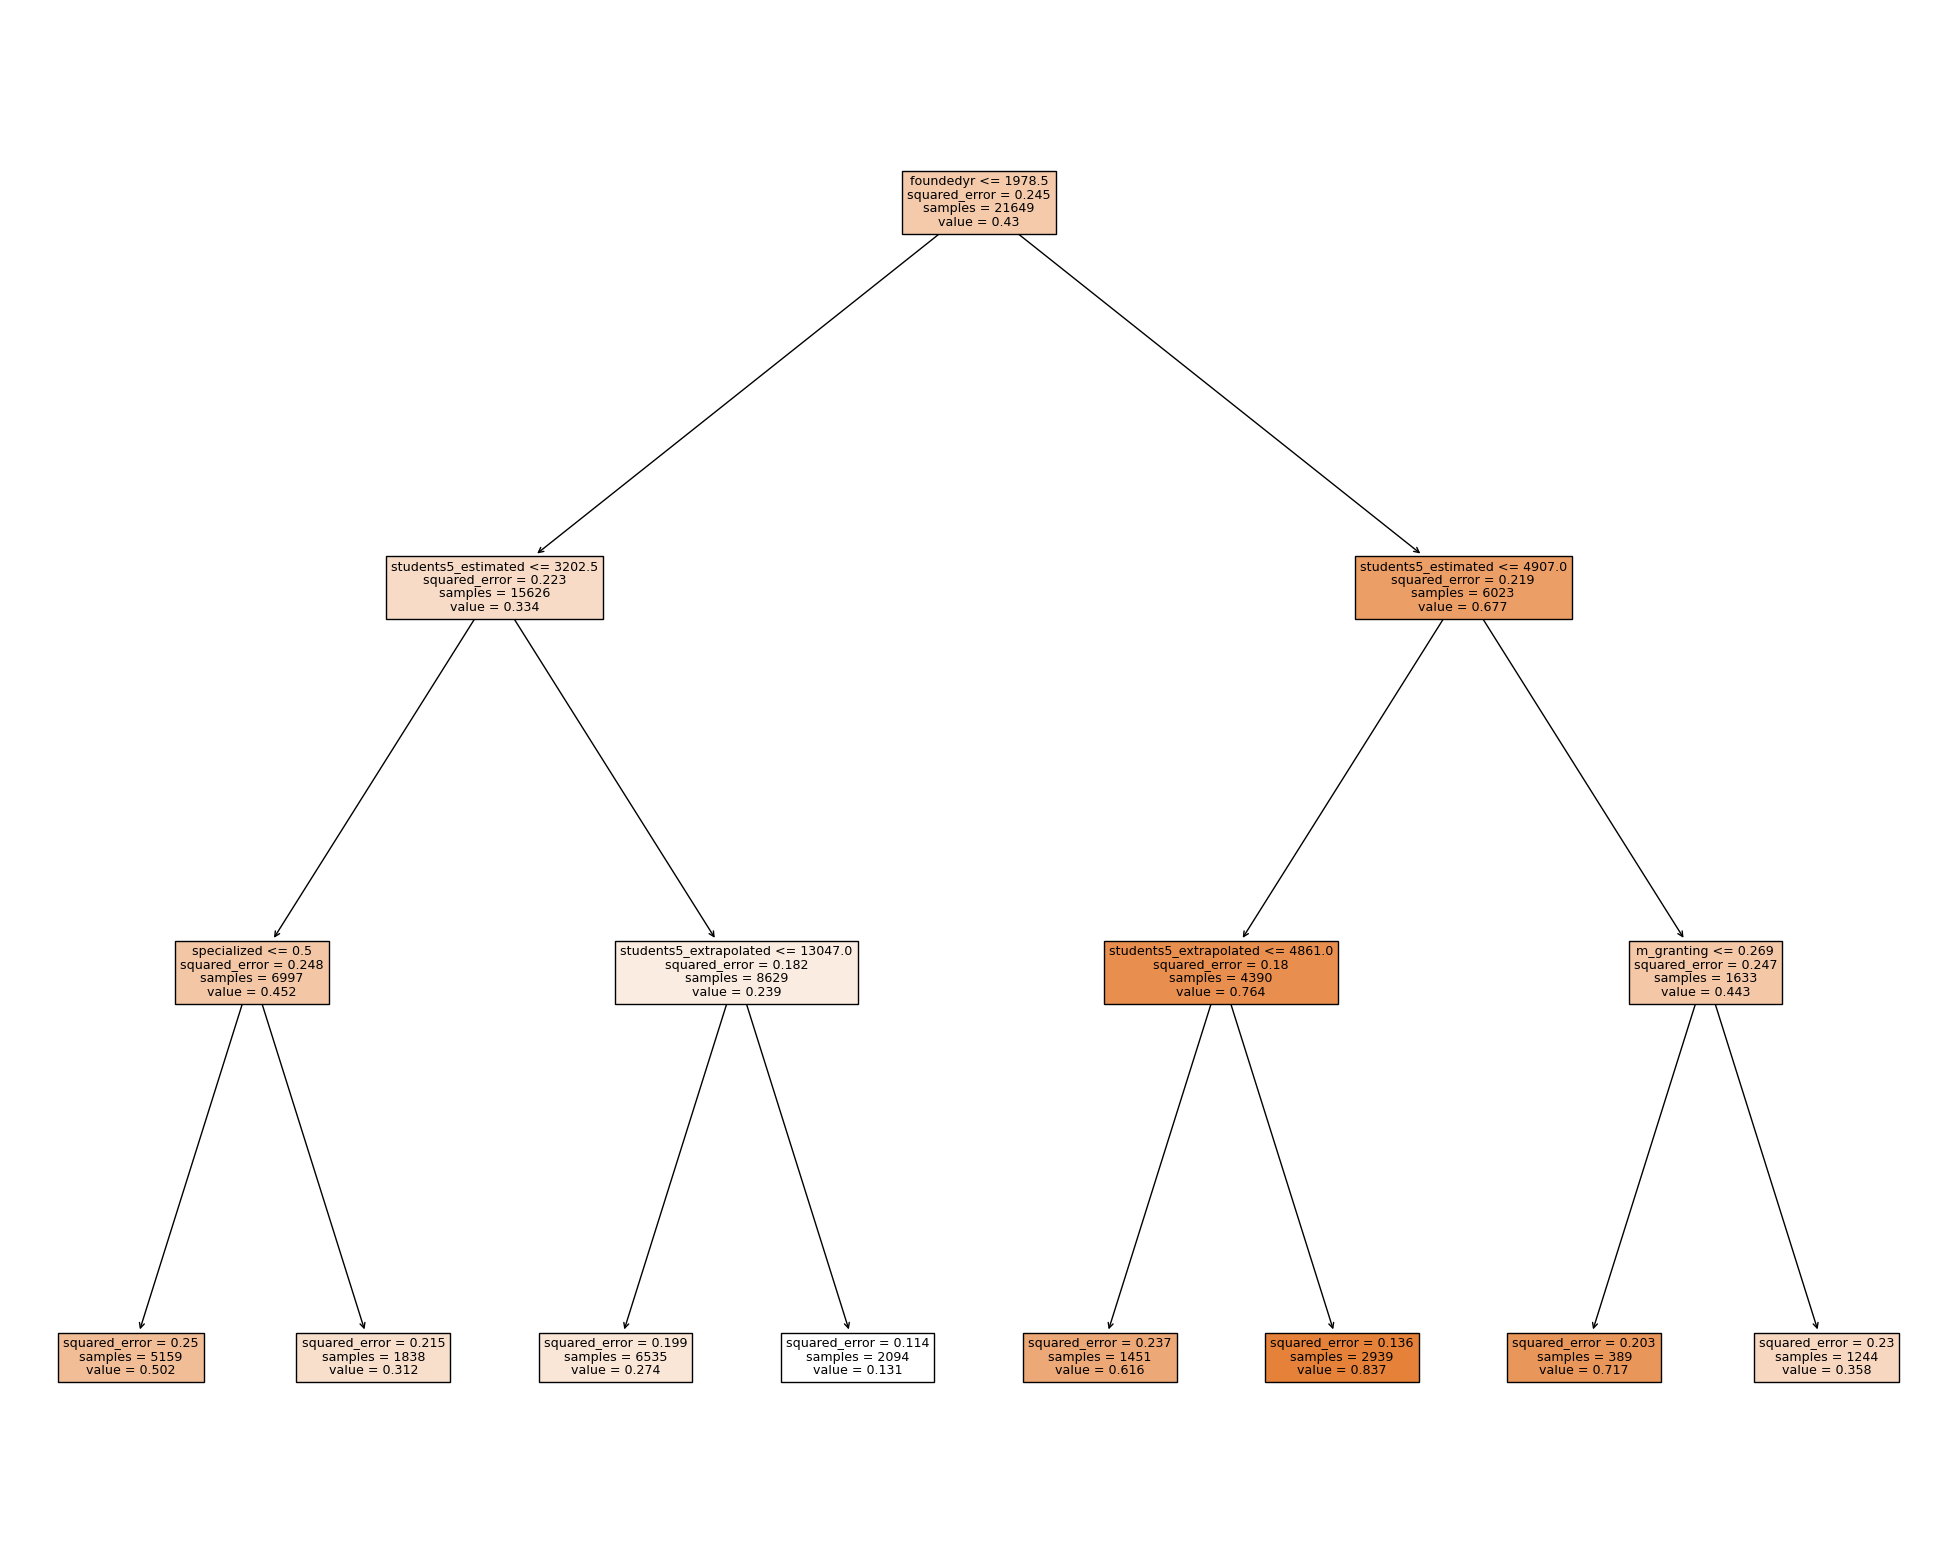

In [179]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DTree, feature_names= features.columns, filled=True)

In [180]:
import h2o
from h2o.automl import H2OAutoML

In [181]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "19" 2022-09-20; OpenJDK Runtime Environment (build 19+36-2238); OpenJDK 64-Bit Server VM (build 19+36-2238, mixed mode, sharing)
  Starting server from /Users/dineshpabbati/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/35/p84cg5rs3psfn7mf788l17500000gn/T/tmpzw2vhkd6
  JVM stdout: /var/folders/35/p84cg5rs3psfn7mf788l17500000gn/T/tmpzw2vhkd6/h2o_dineshpabbati_started_from_python.out
  JVM stderr: /var/folders/35/p84cg5rs3psfn7mf788l17500000gn/T/tmpzw2vhkd6/h2o_dineshpabbati_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       America/Denver
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    1 month and 16 days
H2O_cluster_name:           H2O_from_python_dineshpabbati_jk77r6
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.13 final
--------------------------  ------------------------------------

In [182]:
datasetClean.isna().sum()

iau_id1                   0
foundedyr                 0
yrclosed                  0
phd_granting              0
m_granting                0
b_granting                0
divisions                 0
total_fields              0
unique_fields             0
specialized               0
merger                    0
noiau                     0
year                      0
students5_interpolated    0
students5_extrapolated    0
students5_estimated       0
private01                 0
dtype: int64

In [183]:
#Reducing the size of the dataset to 50% due to permormance issues with my hardware
dataset_train = datasetClean.sample(frac=.2)
dataset_test = datasetClean.drop(dataset_train.index)

In [184]:
dataset_train.shape

(6462, 17)

In [185]:
dataset_test = dataset_test.sample(frac=.5)

In [186]:
dataset_train.isna().sum()

iau_id1                   0
foundedyr                 0
yrclosed                  0
phd_granting              0
m_granting                0
b_granting                0
divisions                 0
total_fields              0
unique_fields             0
specialized               0
merger                    0
noiau                     0
year                      0
students5_interpolated    0
students5_extrapolated    0
students5_estimated       0
private01                 0
dtype: int64

In [187]:
features_autoML = list(features.columns)
features_autoML

['iau_id1',
 'foundedyr',
 'yrclosed',
 'phd_granting',
 'm_granting',
 'b_granting',
 'divisions',
 'total_fields',
 'unique_fields',
 'specialized',
 'merger',
 'noiau',
 'year',
 'students5_interpolated',
 'students5_extrapolated',
 'students5_estimated']

In [188]:
target_autoML = 'private01'

In [189]:
dataset_train.head()

iau_id1  foundedyr     yrclosed  phd_granting  m_granting  b_granting  \
45842      3550     1878.0  2007.595652           0.0    0.538853    0.844634   
3668      13895     1998.0  2007.595652           0.0    0.538853    0.844634   
31884      9243     1950.0  2007.595652           0.0    0.538853    0.844634   
114244     5197     1932.0  2007.595652           0.0    0.538853    0.844634   
127905     5619     1964.0  2007.595652           0.0    0.538853    0.844634   

        divisions  total_fields  unique_fields  specialized  merger  noiau  \
45842    7.011316     26.703367        22.6904          1.0     0.0    0.0   
3668     7.011316     26.703367        22.6904          1.0     0.0    0.0   
31884    7.011316     26.703367        22.6904          0.0     0.0    0.0   
114244   7.011316     26.703367        22.6904          0.0     0.0    0.0   
127905   7.011316     26.703367        22.6904          0.0     0.0    0.0   

          year  students5_interpolated  students5_extrapolated  \
45842   2010.0              11423.0553              695.000000   
3668    2010.0              11423.0553             8888.690553   
31884   1995.0               6007.0000             6007.000000   
114244  1965.0              11423.0553             8888.690553   
127905  2010.0              33052.0000            33052.000000   

        students5_estimated  private01  
45842                 695.0        0.0  
3668                 5113.0        0.0  
31884                6007.0        1.0  
114244               1239.0        0.0  
127905              33052.0        0.0

In [190]:
#Converting from pandas dataframe to Automl Dataset
datasetAutoML = h2o.H2OFrame(dataset_train)
datasetAutoMLTest = h2o.H2OFrame(dataset_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [191]:
datasetAutoML.head()

iau_id1    foundedyr    yrclosed    phd_granting    m_granting    b_granting    divisions    total_fields    unique_fields    specialized    merger    noiau    year    students5_interpolated    students5_extrapolated    students5_estimated    private01
---------  -----------  ----------  --------------  ------------  ------------  -----------  --------------  ---------------  -------------  --------  -------  ------  ------------------------  ------------------------  ---------------------  -----------
     3550         1878      2007.6               0      0.538853      0.844634      7.01132         26.7034          22.6904              1         0        0    2010                   11423.1                    695                    695               0
    13895         1998      2007.6               0      0.538853      0.844634      7.01132         26.7034          22.6904              1         0        0    2010                   11423.1                   8888.69                5113               0
     9243         1950      2007.6               0      0.538853      0.844634      7.01132         26.7034          22.6904              0         0        0    1995                    6007                     6007                   6007               1
     5197         1932      2007.6               0      0.538853      0.844634      7.01132         26.7034          22.6904              0         0        0    1965                   11423.1                   8888.69                1239               0
     5619         1964      2007.6               0      0.538853      0.844634      7.01132         26.7034          22.6904              0         0        0    2010                   33052                    33052                  33052               0
    12085         1955      2007.6               0      0.538853      0.844634      7.01132         26.7034          22.6904              0         0        0    1965                   11423.1                   1567                   1567               0
    13905         2007      2007.6               0      1             1             4               12               11                   0         0        0    2020                   11423.1                   8888.69                2291               0
     4814         1915      2007.6               0      0.538853      0.844634      7.01132         26.7034          22.6904              0         1        0    1960                    3143                     3143                   6803.97            0
     5873         1930      2007.6               0      0.538853      0.844634      7.01132         26.7034          22.6904              0         0        0    1985                   11423.1                   2133                   2133               0
     7365         1927      2007.6               0      0.538853      0.844634      7.01132         26.7034          22.6904              0         0        0    2015                    5654                     5654                   5654               0
[10 rows x 17 columns]

In [192]:
aml = H2OAutoML()
aml.train(x = features_autoML, y = target_autoML, training_frame= datasetAutoML)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_Best1000_1_AutoML_1_20230325_95321


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       25/344
# GBM base models (used / total)           5/169
# XGBoost base models (used / total)       18/124
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  2/48
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.02650068478715165
RMSE: 0.16279030925442597
MAE: 0.12192236913292603
RMSLE: 0.1177190859471044
Mean Residual Deviance: 0.02650068478715165
R^2: 0.8917623398810623
Null degrees of freedom: 6461
Residual degrees of freedom: 6436
Null deviance: 1582.1427117546896
Residual deviance: 171.24742509457397
AIC: -5068.476762506521

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.14485141935343657
RMSE: 0.38059350934223324
MAE: 0.297340237449461
RMSLE: 0.2678130629121973
Mean Residual Deviance: 0.14485141935343657
R^2: 0.40837835619537144
Null degrees of freedom: 6461
Residual degrees of freedom: 6435
Null deviance: 1582.8240696444989
Residual deviance: 936.0298718619072
AIC: 5909.475465647258

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.297351  0.00688563  0.3086        0.290399      0.293962      0.295698      0.298097
mean_residual_deviance  0.144872  0.00705228  0.157027      0.139907      0.140124      0.142938      0.144362
mse                     0.144872  0.00705228  0.157027      0.139907      0.140124      0.142938      0.144362
null_deviance           316.565   4.32925     316.227       312.268       312.61        319.467       322.251
r2                      0.407964  0.025215    0.364263      0.427839      0.42125       0.41145       0.415015
residual_deviance       187.206   8.65179     200.68        178.661       180.62        187.82        188.248
rmse                    0.380532  0.00914516  0.396266      0.374041      0.374332      0.378071      0.37995
rmsle                   0.267786  0.0054356   0.277203      0.263122      0.265829      0.266322      0.266451

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [193]:
lb = aml.leaderboard

In [194]:
# To generate predictions on a test set, you can make predictions
# directly on the `H2OAutoML` object or on the leader model
# object directly
preds = aml.predict(datasetAutoMLTest)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [195]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_Best1000_1_AutoML_1_20230325_95321      0.380594  0.144851  0.29734   0.267813                  0.144851                1840                   0.059346  StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20230325_95321     0.380796  0.145006  0.297891  0.267908                  0.145006                1557                   0.05108   StackedEnsemble
StackedEnsemble_AllModels_6_AutoML_1_20230325_95321     0.380961  0.145131  0.299059  0.268022                  0.145131                3091                   0.086233  StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20230325_95321     0.381132  0.145262  0.298349  0.268136                  0.145262                1420                   0.052461  StackedEnsemble
StackedEnsemble_AllModels_5_AutoML_1_20230325_95321     0.381686  0.145684  0.286965  0.267606                  0.145684               17618                   0.49895   StackedEnsemble
StackedEnsemble_BestOfFamily_6_AutoML_1_20230325_95321  0.384309  0.147694  0.29168   0.269231                  0.147694                 995                   0.032332  StackedEnsemble
StackedEnsemble_BestOfFamily_7_AutoML_1_20230325_95321  0.385688  0.148755  0.308933  0.271475                  0.148755                 569                   0.017223  StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20230325_95321  0.386374  0.149285  0.30862   0.271912                  0.149285                 475                   0.014386  StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_1_20230325_95321  0.38638   0.149289  0.308509  0.271901                  0.149289                 228                   0.015149  StackedEnsemble
GBM_grid_1_AutoML_1_20230325_95321_model_49             0.389871  0.152     0.315927  0.274907                  0.152                    825                   0.014456  GBM
[358 rows x 9 columns]

In [196]:
#Finding the best automl model
m = aml.get_best_model()

In [197]:
print(m)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_Best1000_1_AutoML_1_20230325_95321


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       25/344
# GBM base models (used / total)           5/169
# XGBoost base models (used / total)       18/124
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  2/48
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.02650068478715165
RMSE: 0.16279030925442597
MAE: 0.12192236913292603
RMSLE: 0.1177

In [199]:
!pip3 install shap

In [200]:
import shap

In [206]:
pip install sklearn-porter


Note: you may need to restart the kernel to use updated packages.


In [214]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


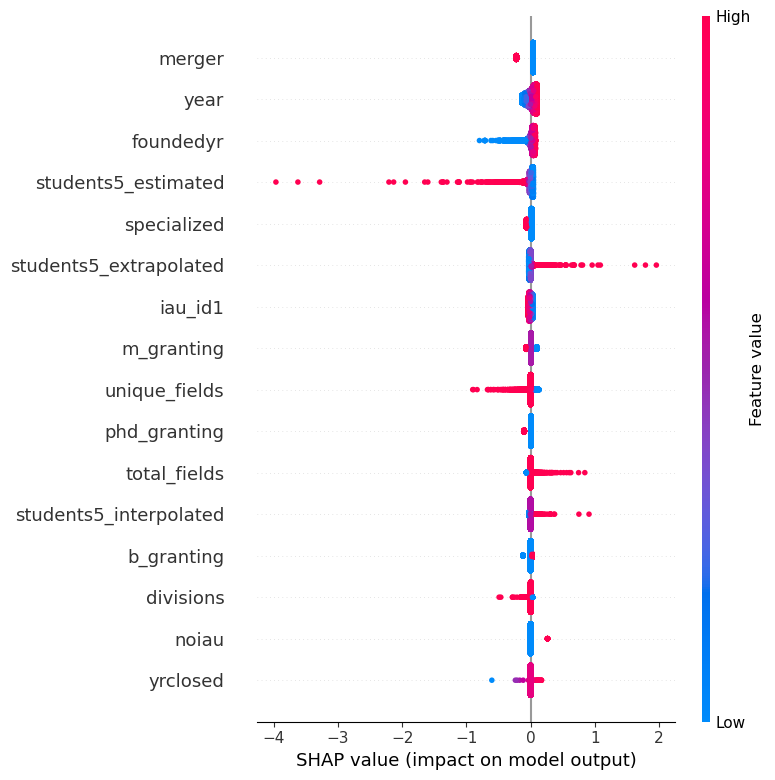

In [215]:
explainer_sh = shap.LinearExplainer(lin_reg, X_train, feature_dependence='independent')
shap_values_lg = explainer_sh.shap_values(X_test)
shap.summary_plot(shap_values_lg, X_test, feature_names=features.columns)

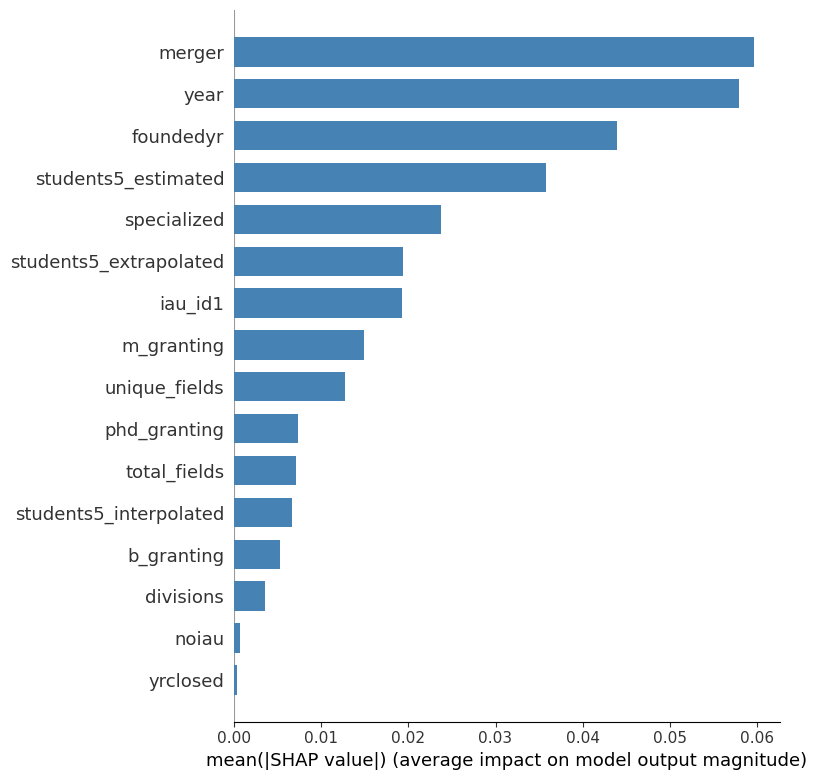

In [216]:
shap.summary_plot(shap_values_lg, X_train, plot_type="bar", color='steelblue')

In [217]:
explainer_tree = shap.Explainer(DTree)
shap_values_tree = explainer_tree(X_test)

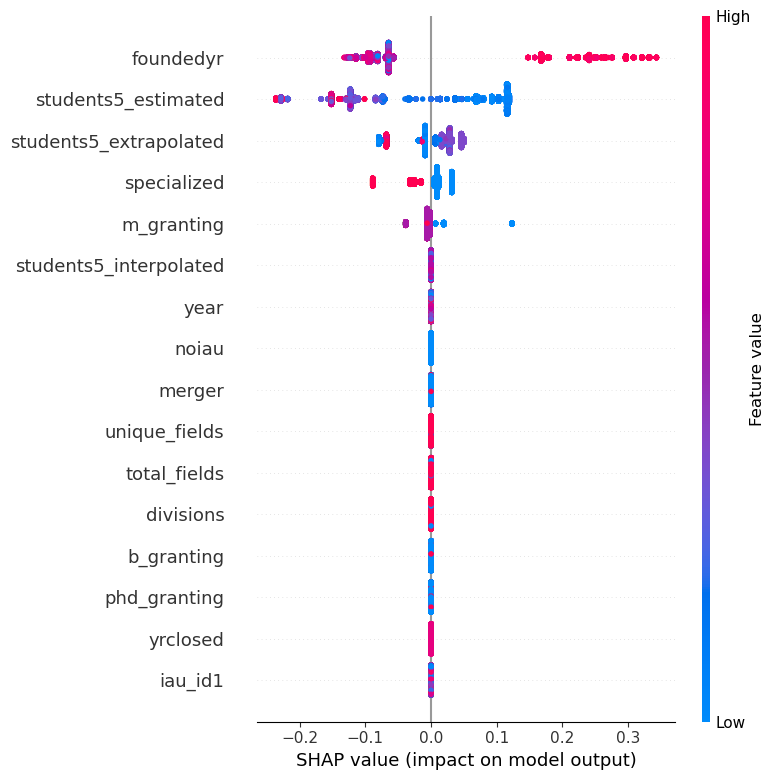

In [218]:
shap.summary_plot(shap_values_tree, X_test, feature_names=features.columns)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                                     rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-----------------------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_Best1000_1_AutoML_1_20230325_95321                       0.373377  0.13941   0.290095  0.262185                  0.13941                 1840                   0.051017  StackedEnsemble
StackedEnsemble_AllModels_5_AutoML_1_20230325_95321                      0.373545  0.139536  0.277407  0.260476                  0.139536               17618                   0.601914  StackedEnsemble
StackedEnsemble_AllModels_6_AutoML_1_20230325_95321                      0.374024  0.139894  0.291083  0.262532                  0.139894                3091                   0.067699  StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20230325_95321                      0.374042  0.139908  0.29004   0.262535                  0.139908                1420                   0.039542  StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20230325_95321                      0.374082  0.139937  0.290789  0.262684                  0.139937                1557                   0.043074  StackedEnsemble
StackedEnsemble_BestOfFamily_7_AutoML_1_20230325_95321                   0.380446  0.144739  0.301738  0.267258                  0.144739                 569                   0.020361  StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20230325_95321                   0.381354  0.145431  0.302476  0.267821                  0.145431                 475                   0.02329   StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_1_20230325_95321                   0.381429  0.145488  0.302327  0.2679                    0.145488                 228                   0.021651  StackedEnsemble
StackedEnsemble_BestOfFamily_6_AutoML_1_20230325_95321                   0.383871  0.147357  0.289235  0.268264                  0.147357                 995                   0.019143  StackedEnsemble
GBM_grid_1_AutoML_1_20230325_95321_model_49                              0.384987  0.148215  0.309581  0.271067                  0.148215                 825                   0.013712  GBM
XGBoost_lr_search_selection_AutoML_1_20230325_95321_select_grid_model_2  0.385138  0.148332  0.304546  0.270467                  0.148332                5242                   0.012177  XGBoost
XGBoost_grid_1_AutoML_1_20230325_95321_model_4                           0.385834  0.148868  0.291765  0.271259                  0.148868                1089                   0.00372   XGBoost
StackedEnsemble_AllModels_2_AutoML_1_20230325_95321                      0.386395  0.149301  0.306486  0.271077                  0.149301                 348                   0.016263  StackedEnsemble
GBM_grid_1_AutoML_1_20230325_95321_model_40                              0.386712  0.149546  0.313002  0.272005                  0.149546                 766                   0.012488  GBM
GBM_grid_1_AutoML_1_20230325_95321_model_101                             0.386721  0.149553  0.312329  0.272155                  0.149553                 728                   0.016407  GBM
GBM_grid_1_AutoML_1_20230325_95321_model_25                              0.386899  0.149691  0.304233  0.272046                  0.149691                 660                   0.018581  GBM
GBM_grid_1_AutoML_1_20230325_95321_model_99                              0.3871    0.149846  0.30871   0.272456                  0.149846                 700                   0.017321  GBM
StackedEnsemble_AllModels_1_AutoML_1_20230325_95321                      0.387139  0.149876  0.307169  0.271631                  0.149876                 414                   0.017339  StackedEnsemble
XGBoost_grid_1_AutoML_1_20230325_95321_model_95

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

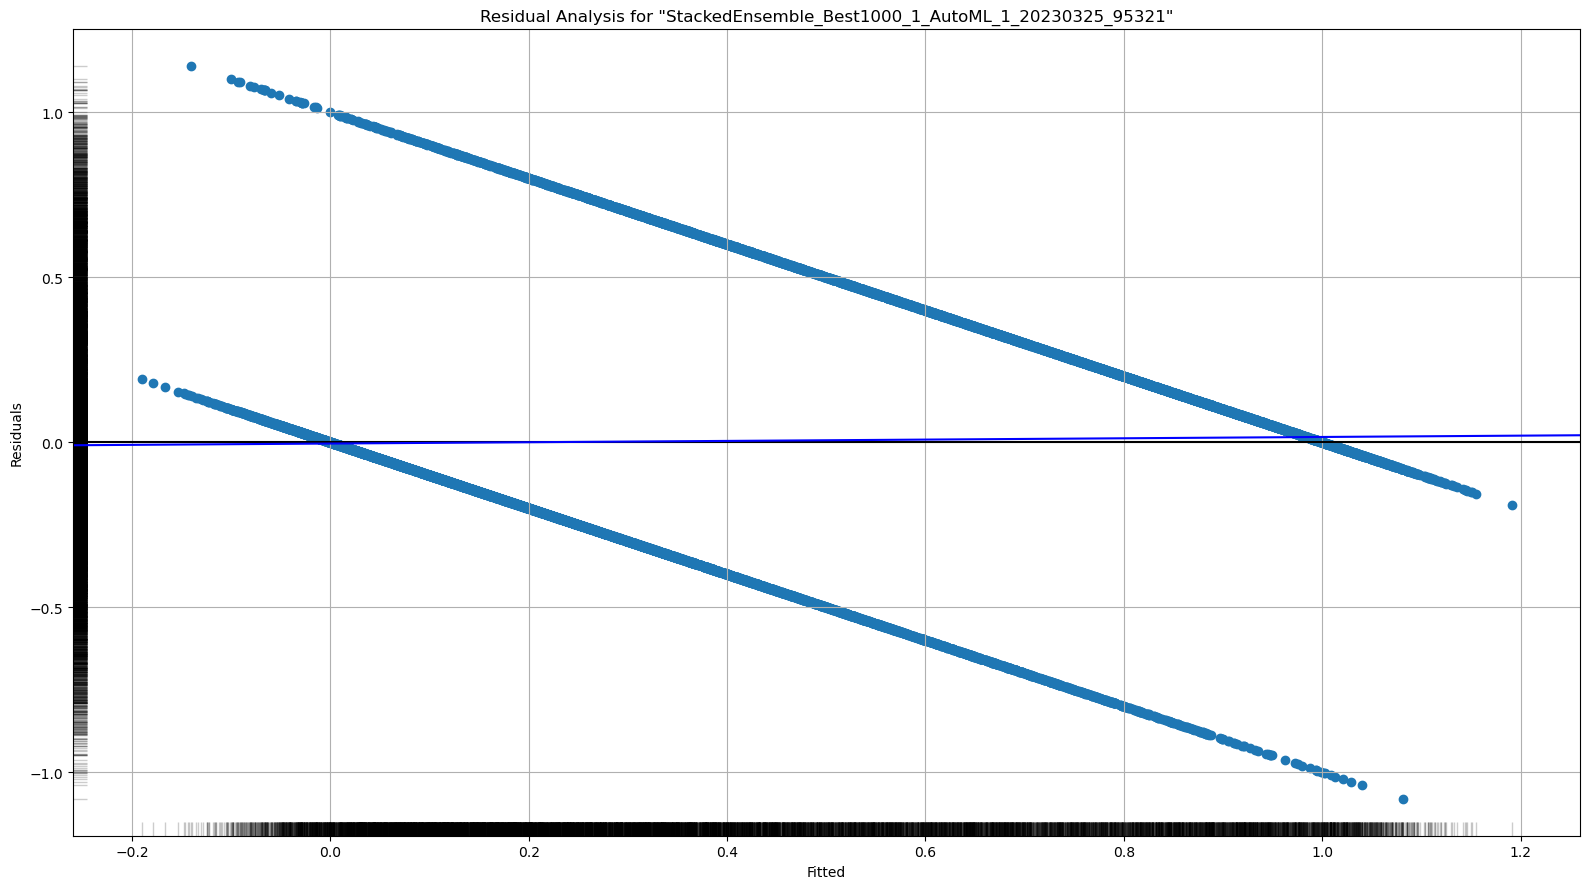

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

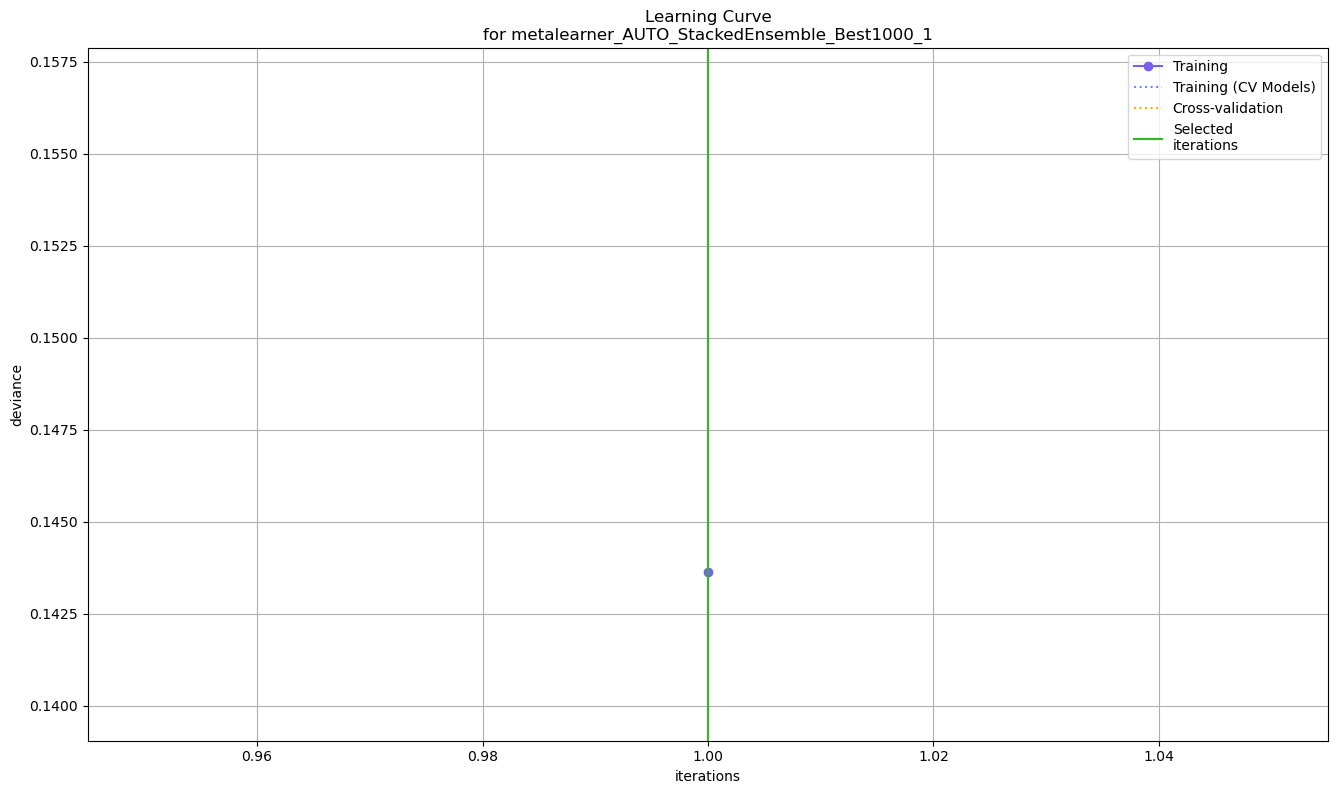

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

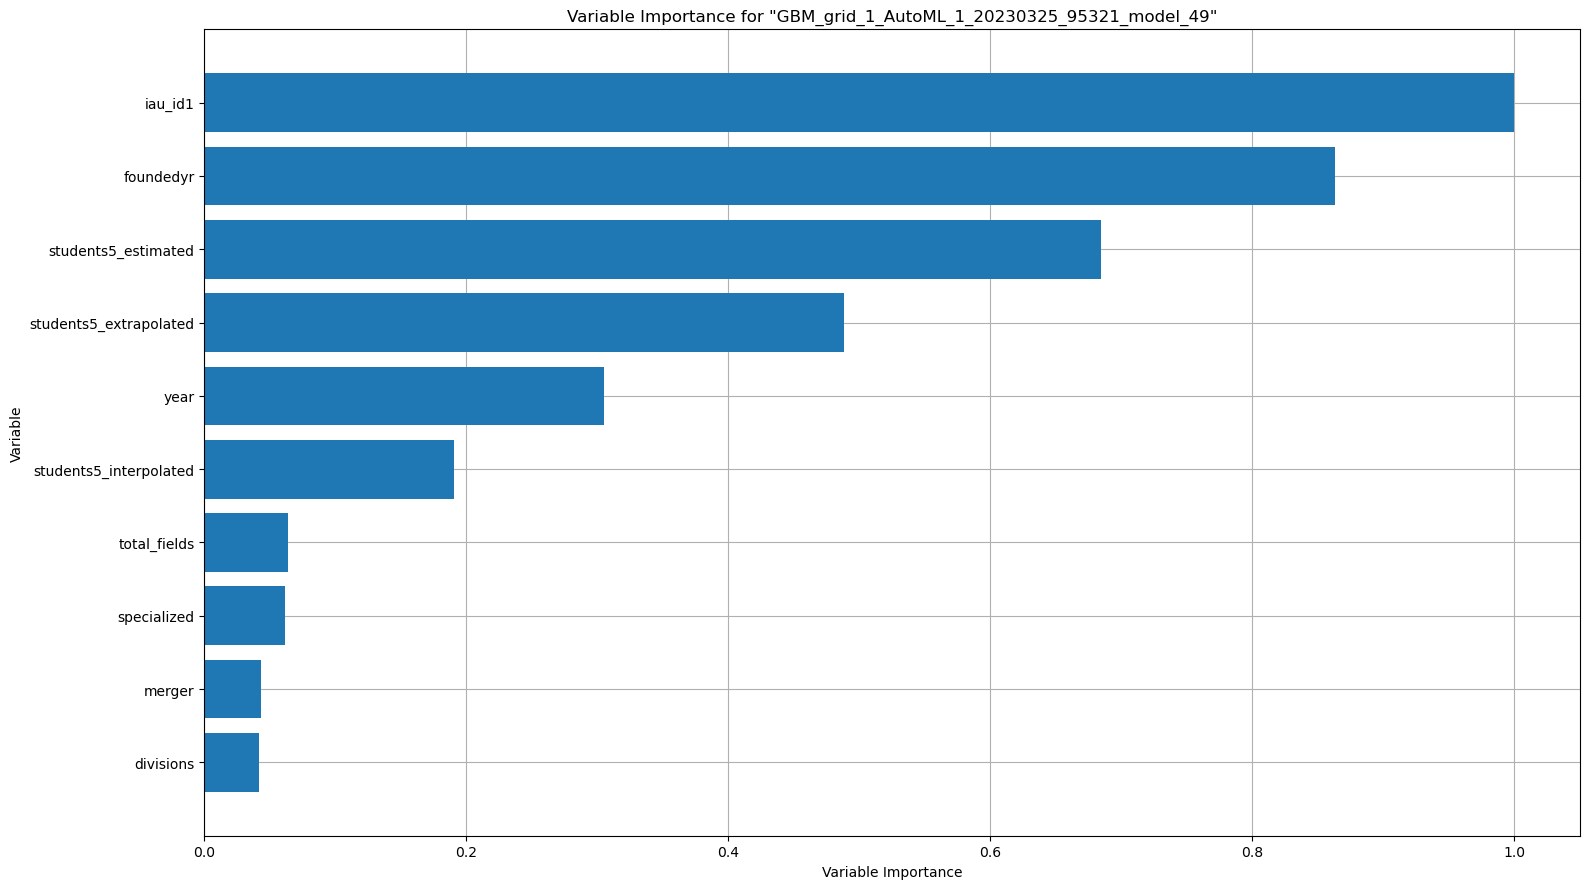

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

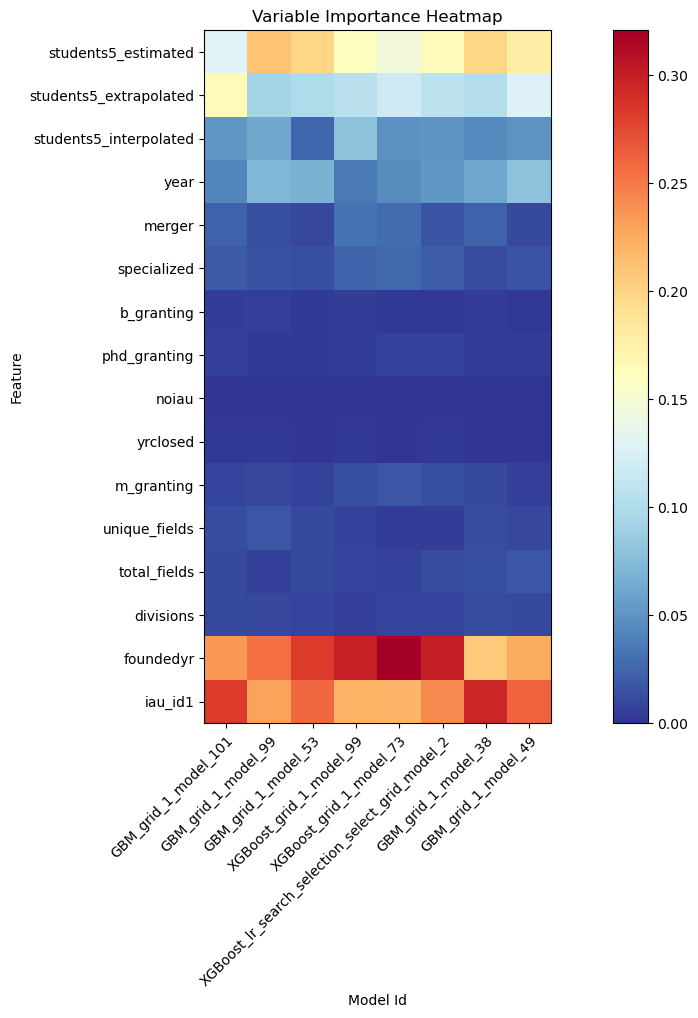

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

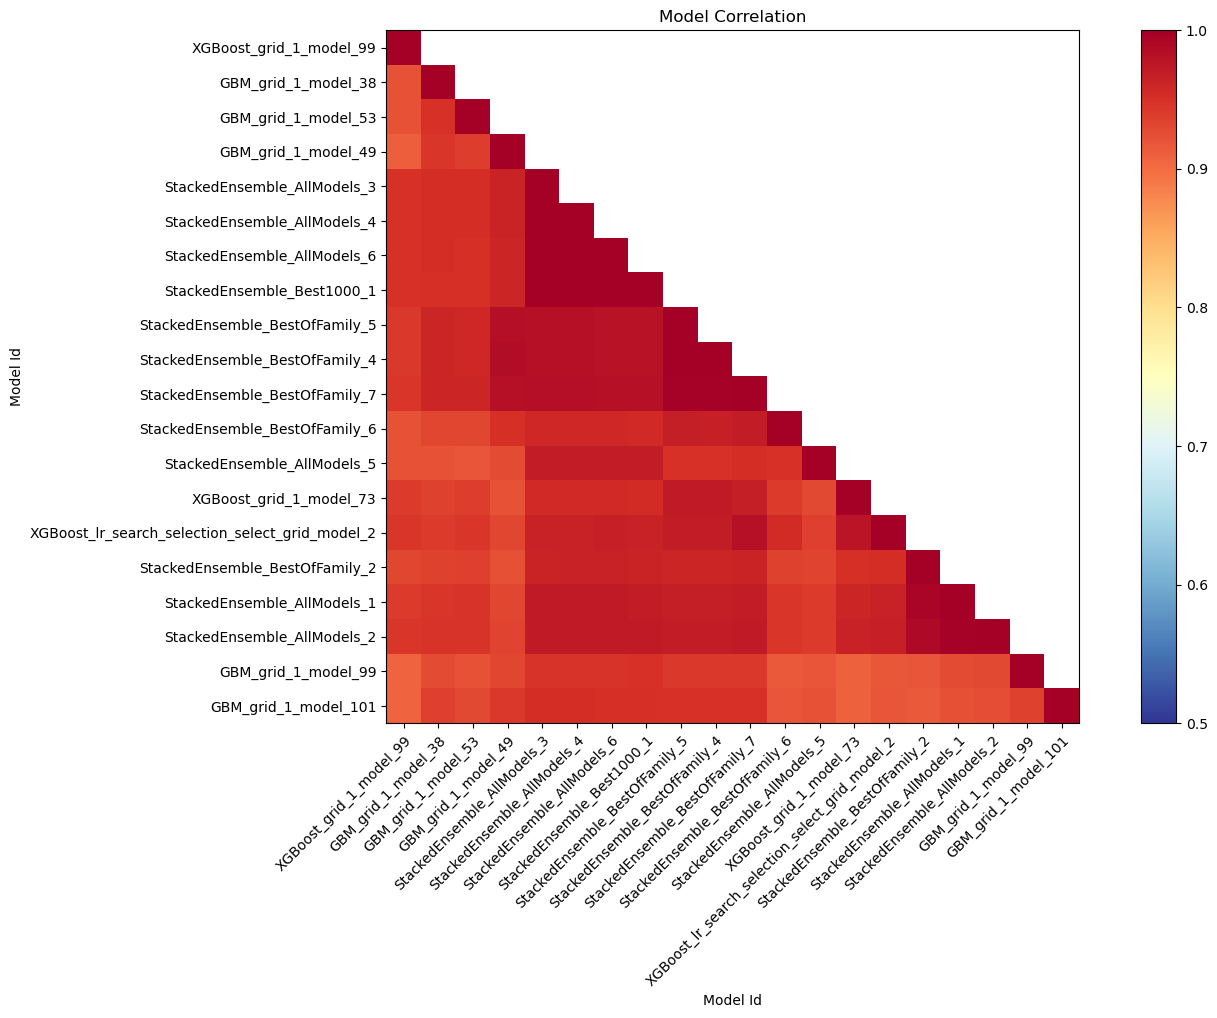

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

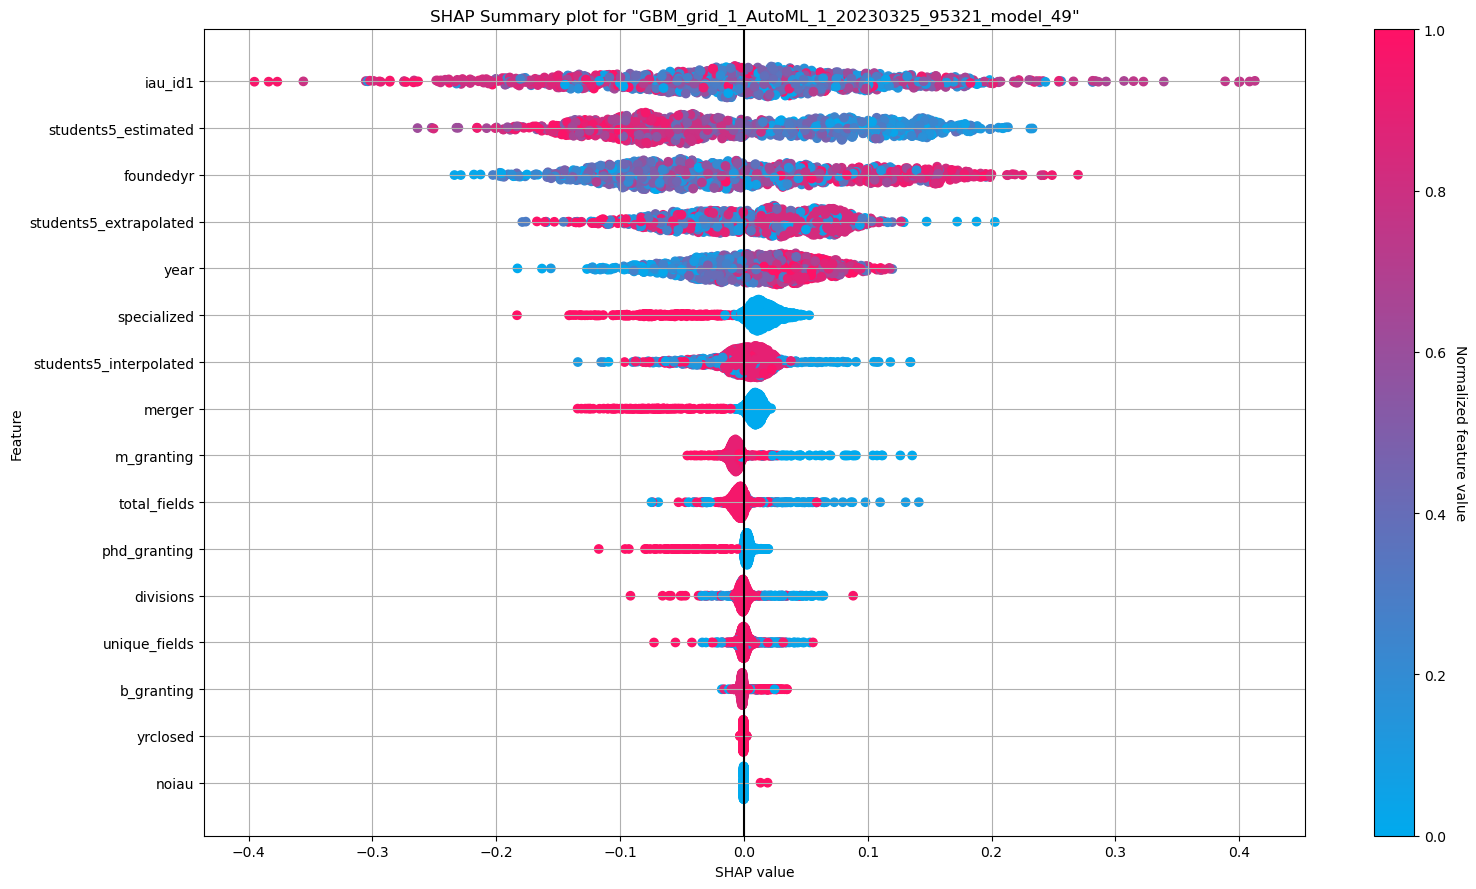

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

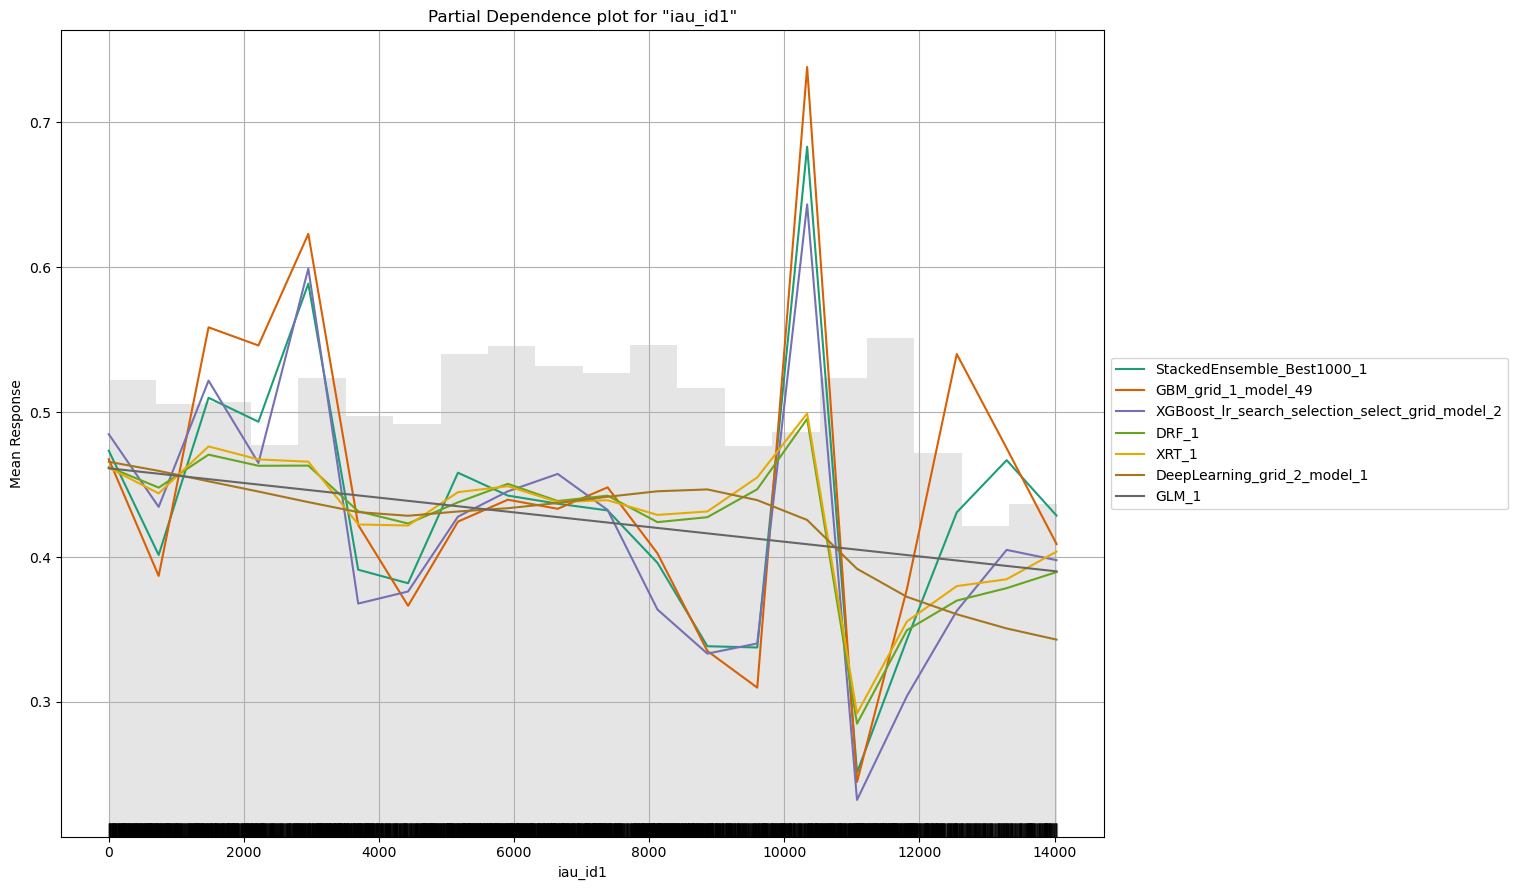

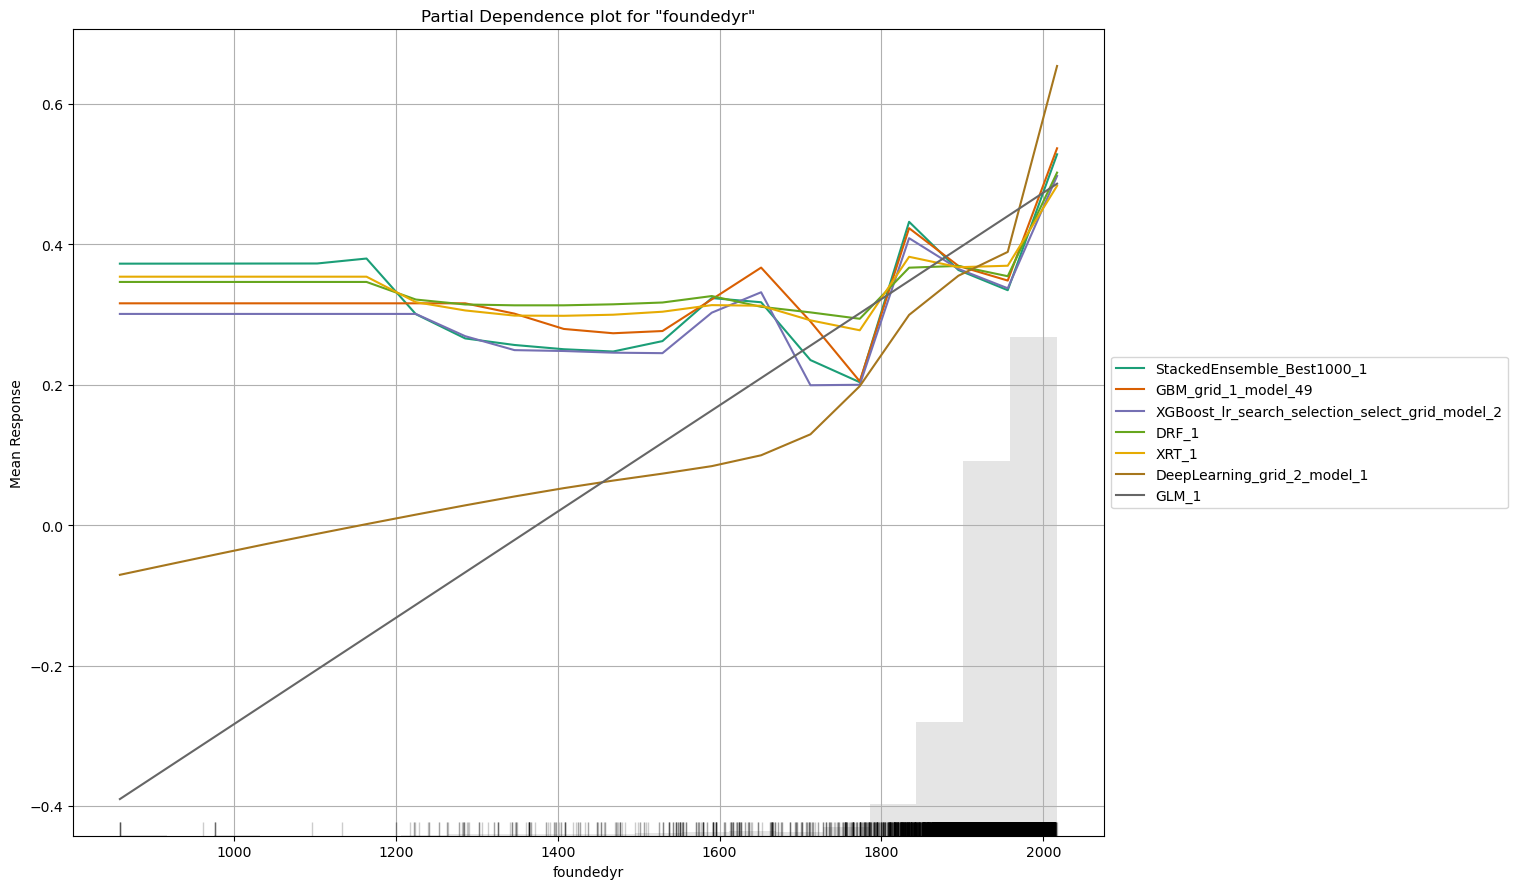

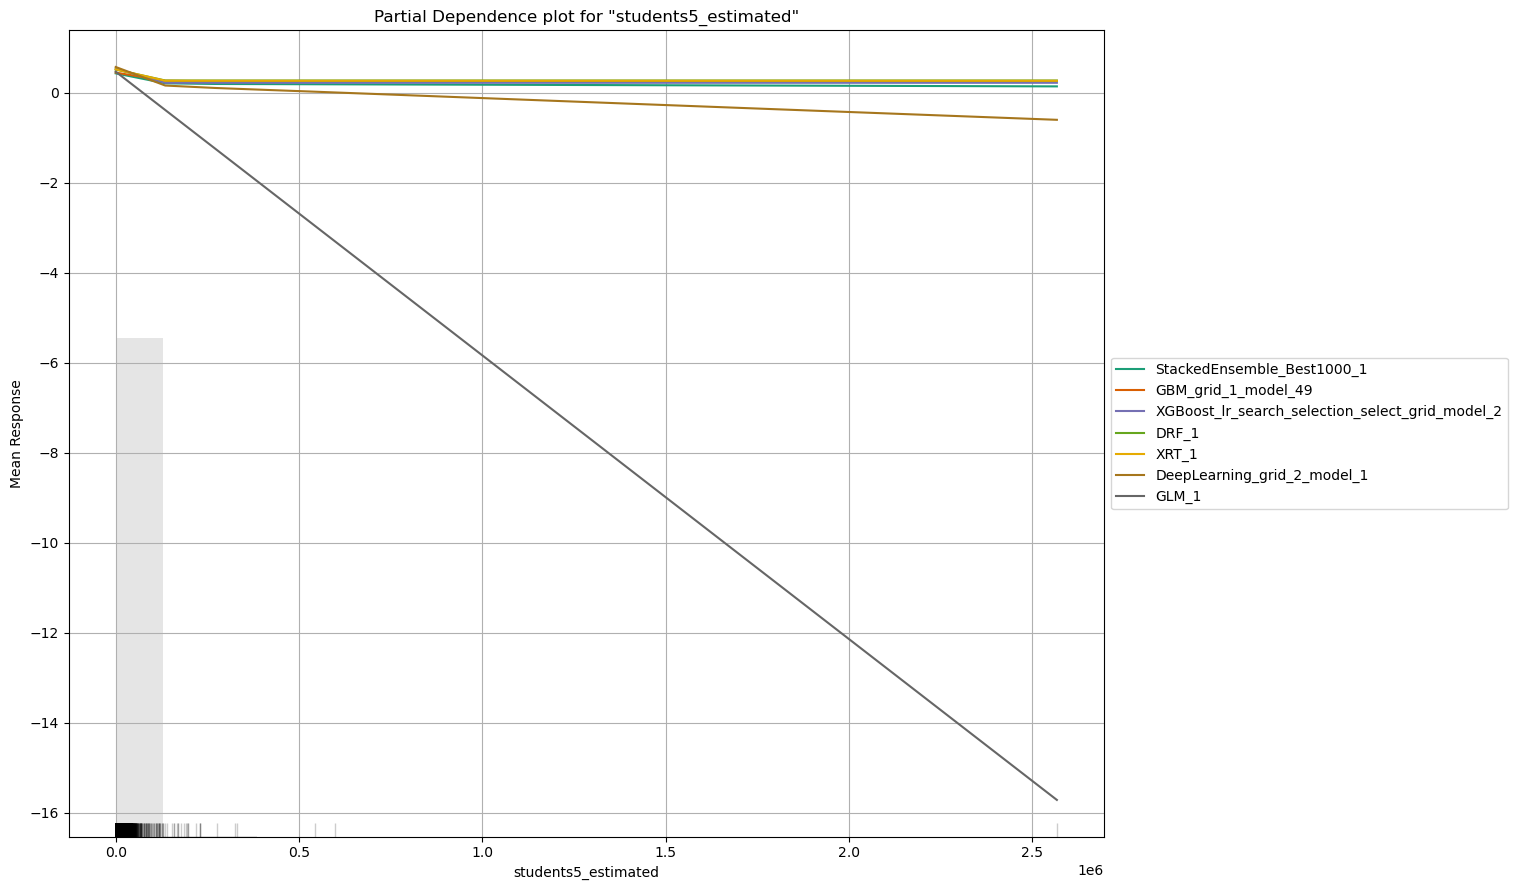

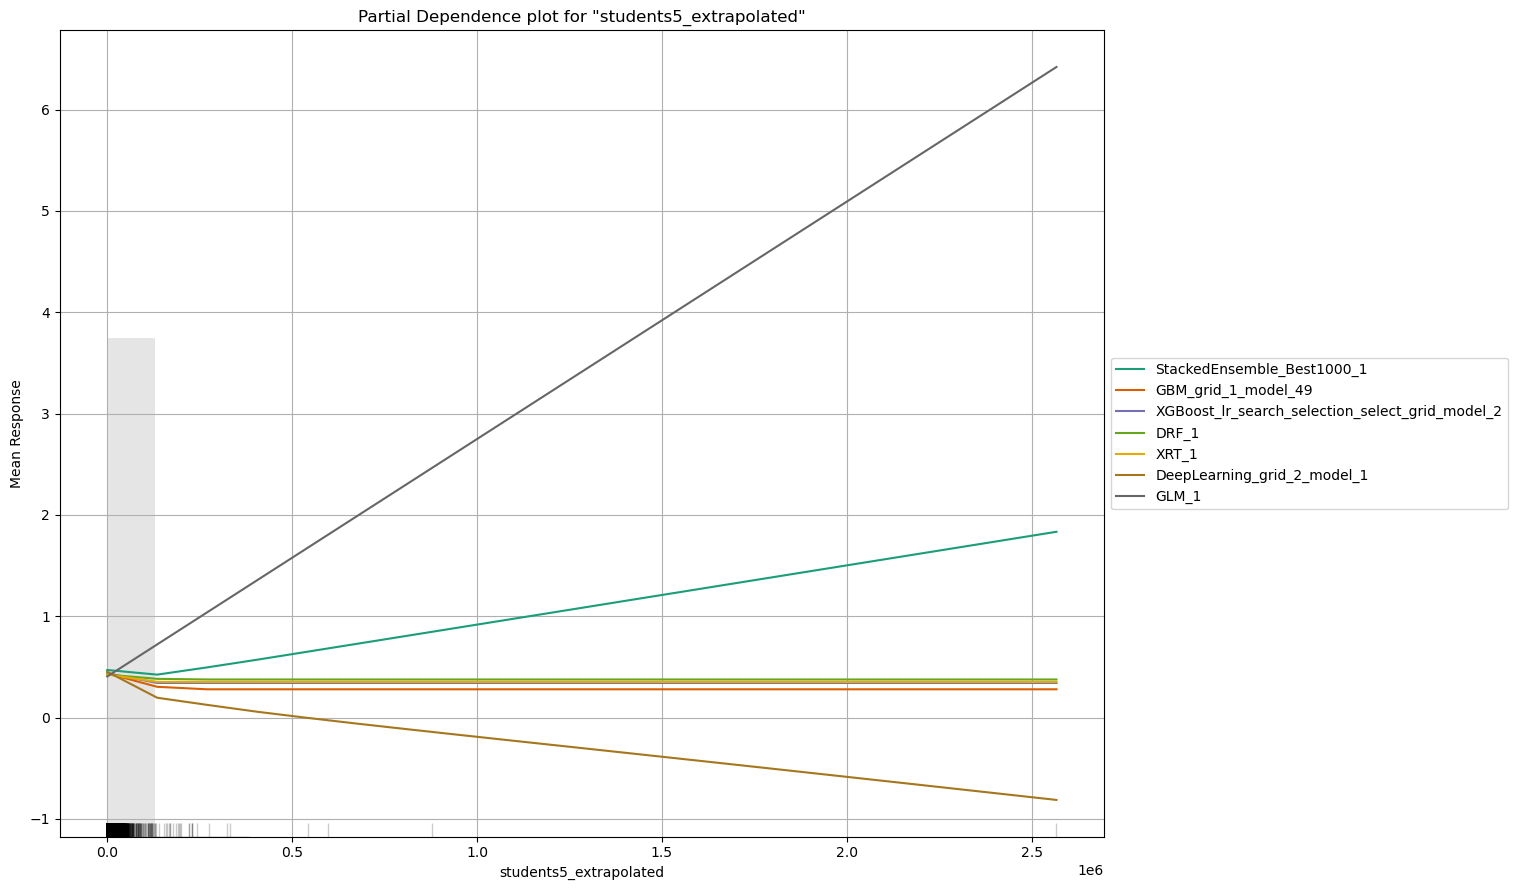

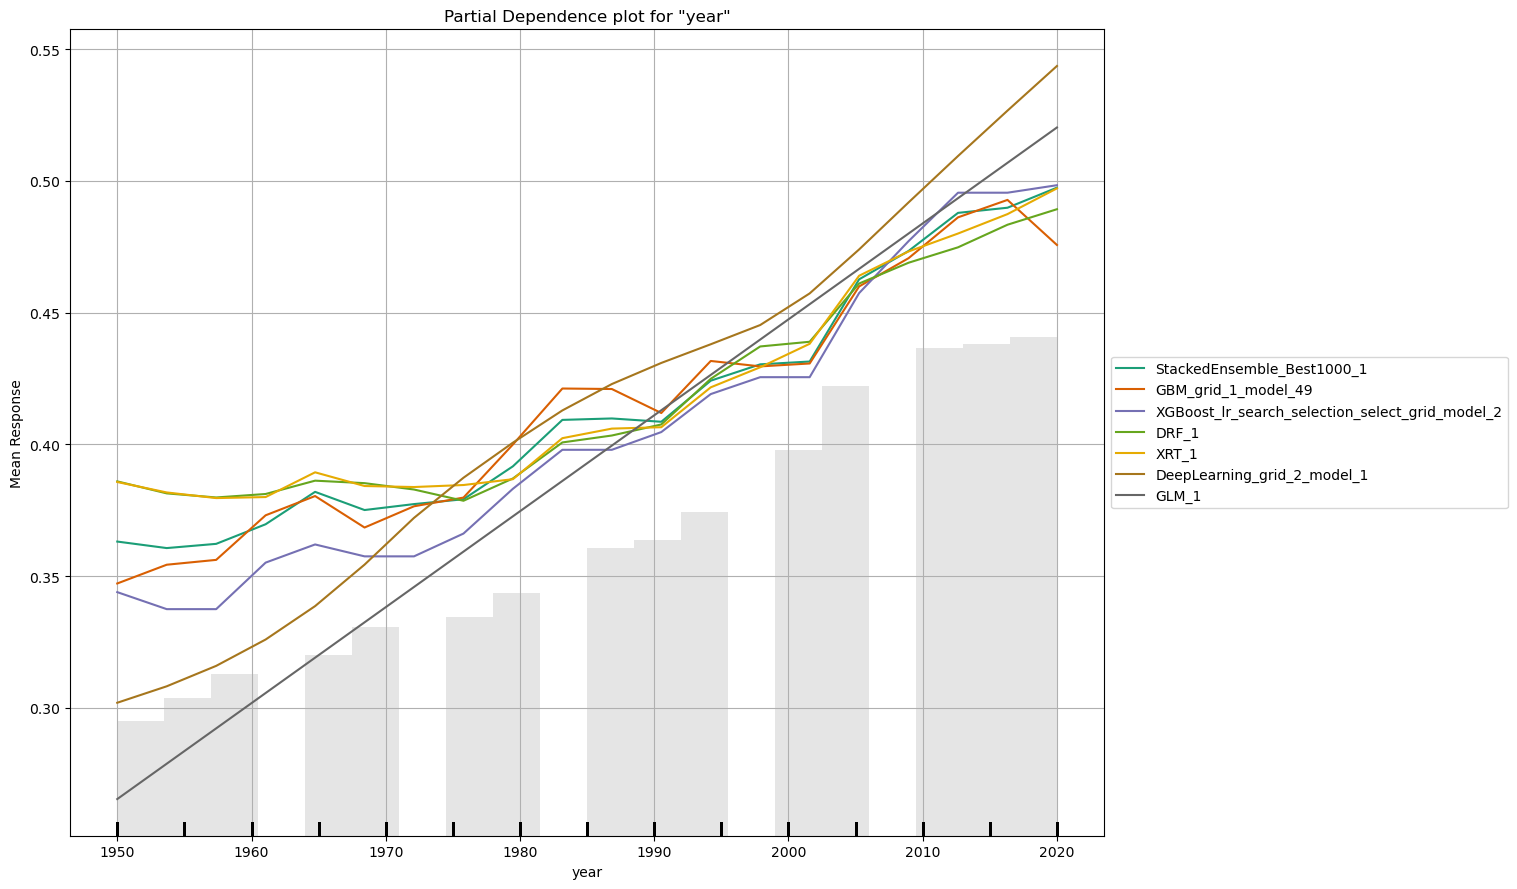

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

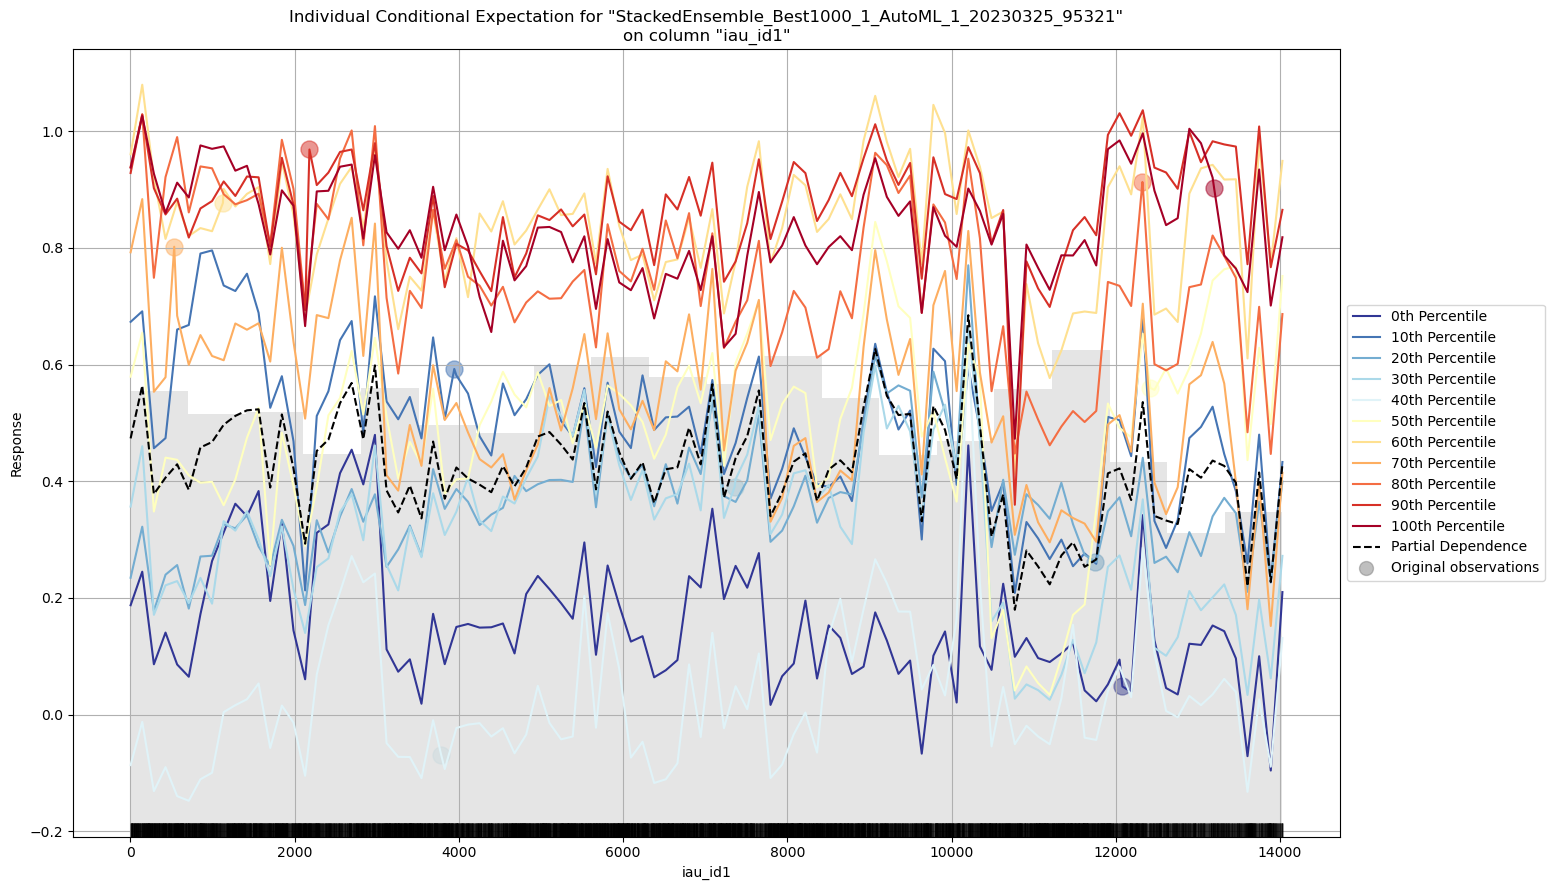

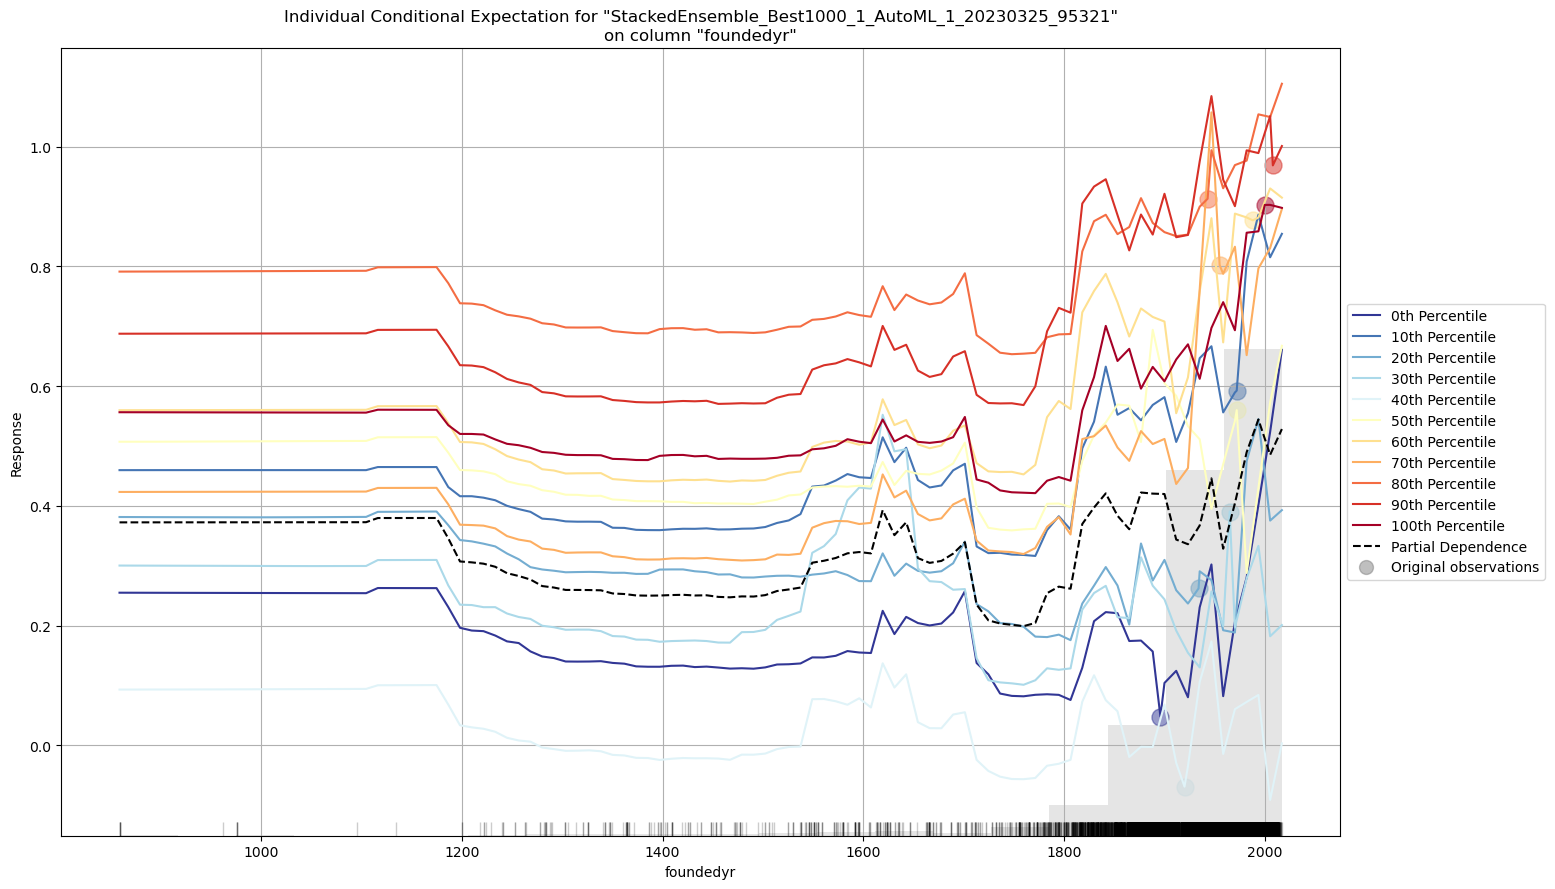

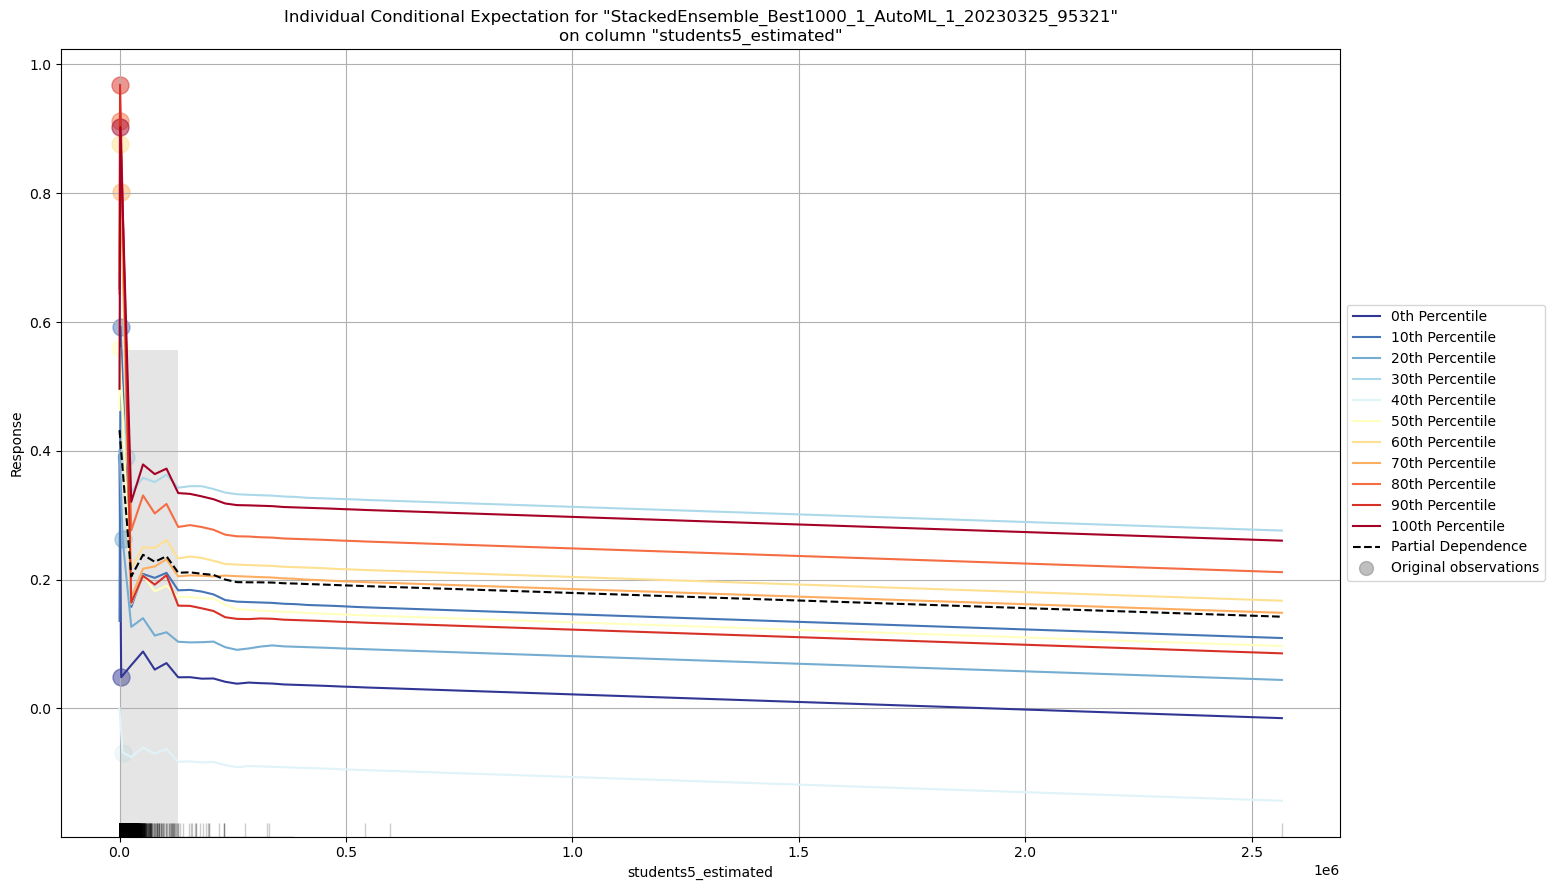

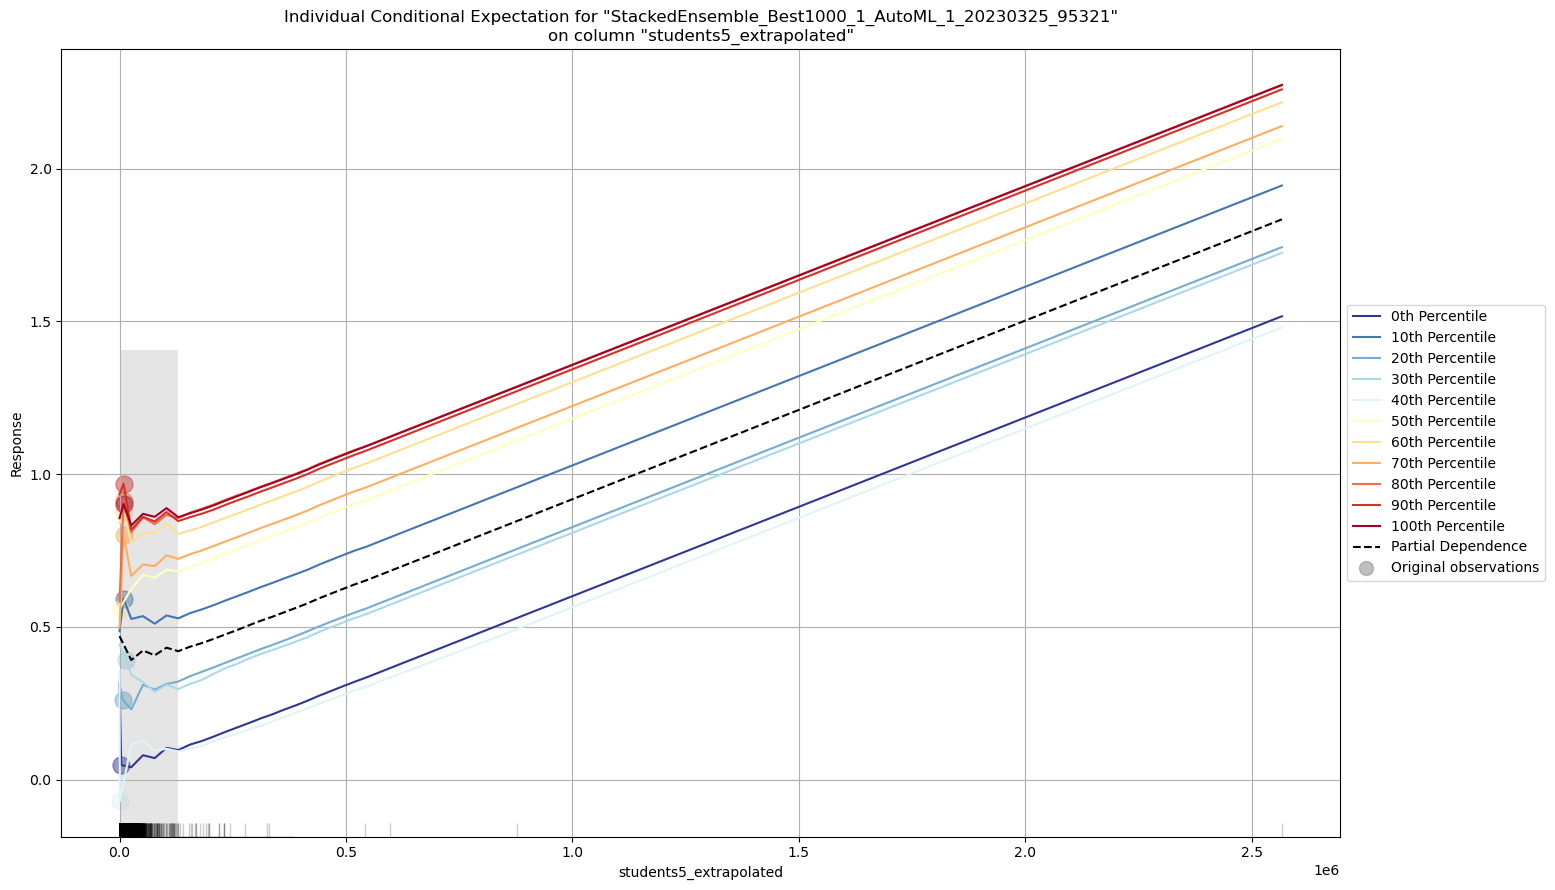

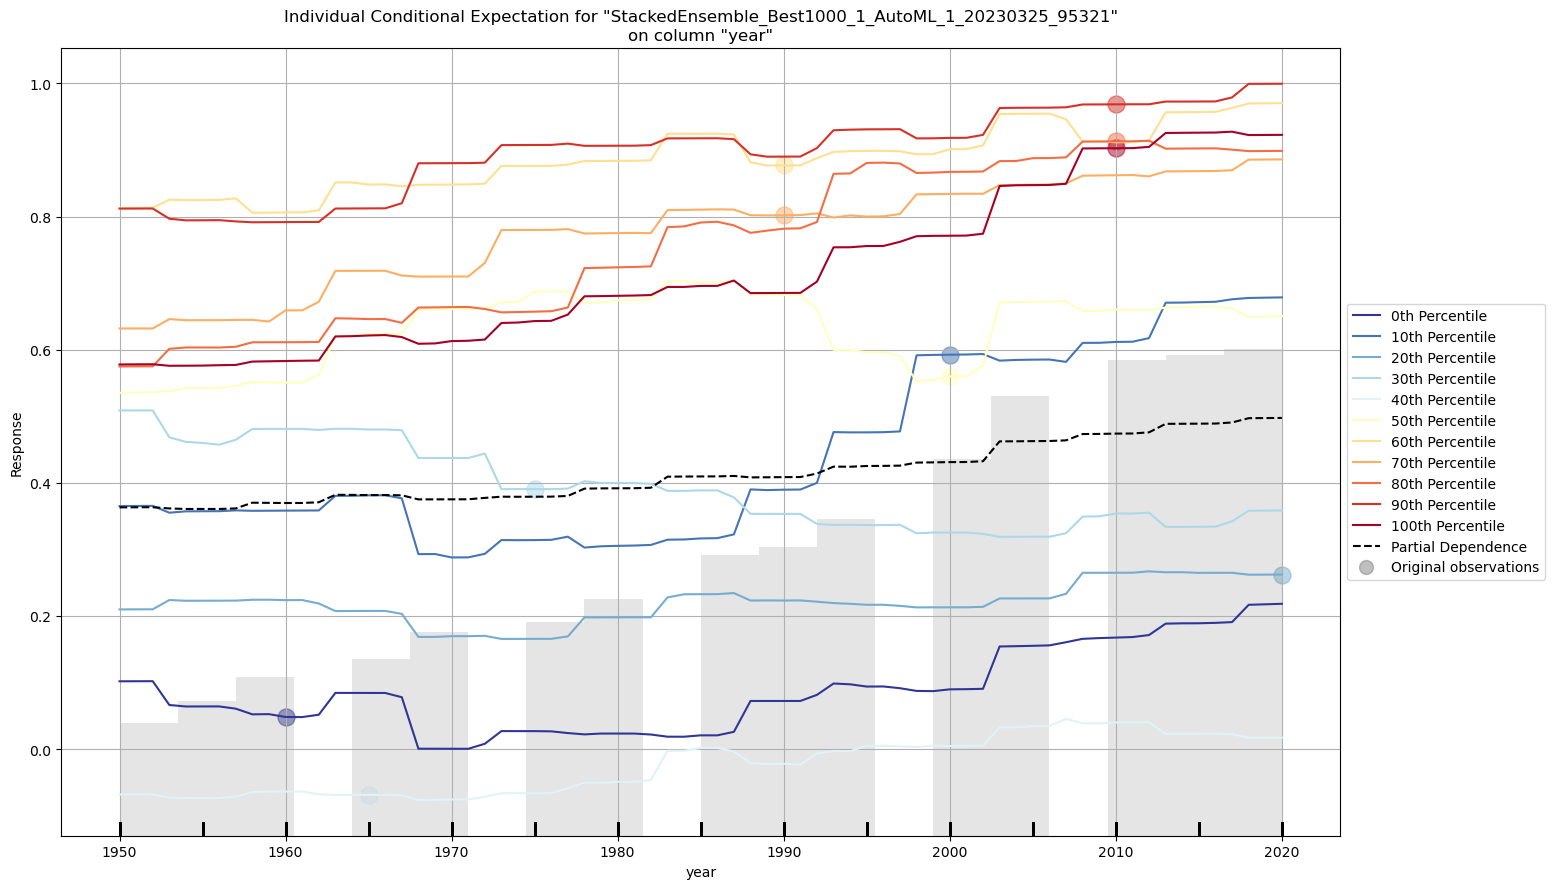

In [219]:
exm = aml.explain(datasetAutoMLTest)

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo                  predict
------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------  ------------
StackedEnsemble_Best1000_1_AutoML_1_20230325_95321      0.373377  0.13941   0.290095  0.262185                  0.13941                 1840                   0.051017  StackedEnsemble   0.0482993
StackedEnsemble_AllModels_5_AutoML_1_20230325_95321     0.373545  0.139536  0.277407  0.260476                  0.139536               17618                   0.601914  StackedEnsemble   0.0825176
StackedEnsemble_AllModels_6_AutoML_1_20230325_95321     0.374024  0.139894  0.291083  0.262532                  0.139894                3091                   0.067699  StackedEnsemble   0.066384
StackedEnsemble_AllModels_3_AutoML_1_20230325_95321     0.374042  0.139908  0.29004   0.262535                  0.139908                1420                   0.039542  StackedEnsemble   0.0634025
StackedEnsemble_AllModels_4_AutoML_1_20230325_95321     0.374082  0.139937  0.290789  0.262684                  0.139937                1557                   0.043074  StackedEnsemble   0.064178
StackedEnsemble_BestOfFamily_7_AutoML_1_20230325_95321  0.380446  0.144739  0.301738  0.267258                  0.144739                 569                   0.020361  StackedEnsemble   0.0465709
StackedEnsemble_BestOfFamily_4_AutoML_1_20230325_95321  0.381354  0.145431  0.302476  0.267821                  0.145431                 475                   0.02329   StackedEnsemble   0.035503
StackedEnsemble_BestOfFamily_5_AutoML_1_20230325_95321  0.381429  0.145488  0.302327  0.2679                    0.145488                 228                   0.021651  StackedEnsemble   0.0348672
StackedEnsemble_BestOfFamily_6_AutoML_1_20230325_95321  0.383871  0.147357  0.289235  0.268264                  0.147357                 995                   0.019143  StackedEnsemble   0.0568954
GBM_grid_1_AutoML_1_20230325_95321_model_49             0.384987  0.148215  0.309581  0.271067                  0.148215                 825                   0.013712  GBM              -0.000710672
[20 rows x 10 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

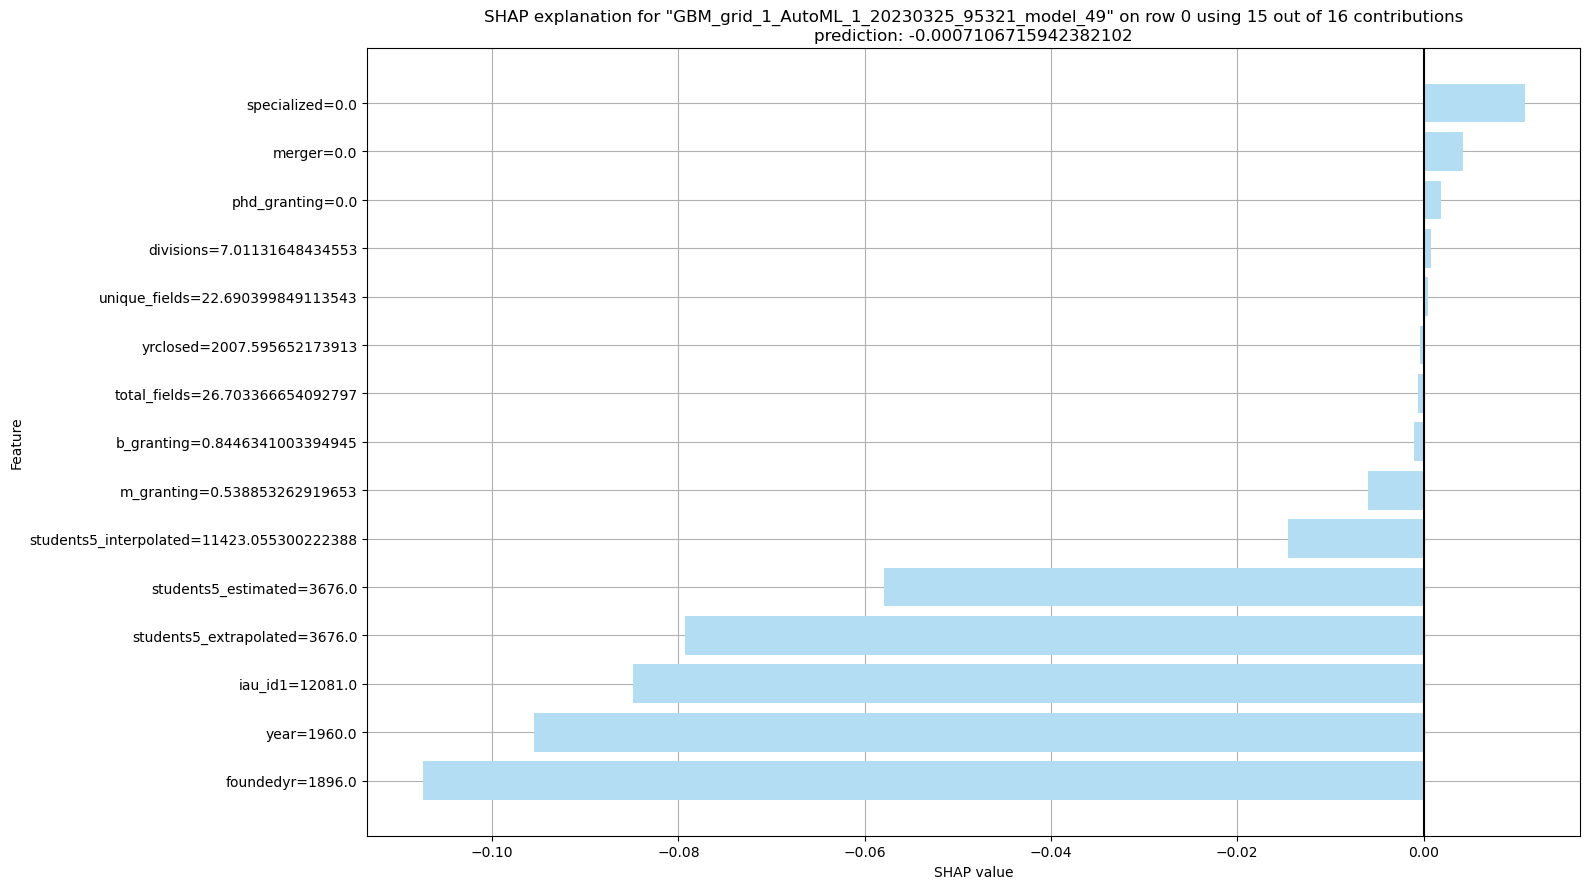

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo                  predict
------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------  ------------
StackedEnsemble_Best1000_1_AutoML_1_20230325_95321      0.373377  0.13941   0.290095  0.262185                  0.13941                 1840                   0.051017  StackedEnsemble   0.0482993
StackedEnsemble_AllModels_5_AutoML_1_20230325_95321     0.373545  0.139536  0.277407  0.260476                  0.139536               17618                   0.601914  StackedEnsemble   0.0825176
StackedEnsemble_AllModels_6_AutoML_1_20230325_95321     0.374024  0.139894  0.291083  0.262532                  0.139894                3091                   0.067699  StackedEnsemble   0.066384
StackedEnsemble_AllModels_3_AutoML_1_20230325_95321     0.374042  0.139908  0.29004   0.262535                  0.139908                1420                   0.039542  StackedEnsemble   0.0634025
StackedEnsemble_AllModels_4_AutoML_1_20230325_95321     0.374082  0.139937  0.290789  0.262684                  0.139937                1557                   0.043074  StackedEnsemble   0.064178
StackedEnsemble_BestOfFamily_7_AutoML_1_20230325_95321  0.380446  0.144739  0.301738  0.267258                  0.144739                 569                   0.020361  StackedEnsemble   0.0465709
StackedEnsemble_BestOfFamily_4_AutoML_1_20230325_95321  0.381354  0.145431  0.302476  0.267821                  0.145431                 475                   0.02329   StackedEnsemble   0.035503
StackedEnsemble_BestOfFamily_5_AutoML_1_20230325_95321  0.381429  0.145488  0.302327  0.2679                    0.145488                 228                   0.021651  StackedEnsemble   0.0348672
StackedEnsemble_BestOfFamily_6_AutoML_1_20230325_95321  0.383871  0.147357  0.289235  0.268264                  0.147357                 995                   0.019143  StackedEnsemble   0.0568954
GBM_grid_1_AutoML_1_20230325_95321_model_49             0.384987  0.148215  0.309581  0.271067                  0.148215                 825                   0.013712  GBM              -0.000710672
[20 rows x 10 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [220]:
aml.explain_row(datasetAutoMLTest, row_index=0)


In [2]:
pip install lime


Note: you may need to restart the kernel to use updated packages.


In [3]:
from lime import lime_tabular


In [4]:
import lime.lime_tabular


In [6]:
import numpy as np


In [46]:
# Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), feature_names=X_train.columns, mode="regression"
)

In [57]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()


In [58]:
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)


In [60]:
# Getting LIME interpretation for a sample data
idx = 18
np_X_test = np.array(X_test)
np_y_test = np.array(y_test)
print("Prediction : ", linear_model.predict(np_X_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_linear_explanation = lime_linear_explainer.explain_instance(
    np_X_test[idx], linear_model.predict, num_features=np_X_test.shape[1]
)
lime_linear_explanation

Prediction :  [0.10387206]
Actual :      1.0


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


In [61]:
lime_linear_explanation.show_in_notebook()  # Display Results in Notebook